# Import statments

In [ ]:
!pip uninstall tensorflow
!pip uninstall scikit-learn
!pip install tensorflow==2.13
!pip install scikit-learn==1.2.2

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.13.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? n
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? n


In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.2.2


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


In [ ]:
#Import necessary libraries

import tensorflow as tf

import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score, precision_score,make_scorer,roc_curve,auc,roc_auc_score
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc, f1_score, recall_score
from sklearn.svm import OneClassSVM
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
!pip install git+https://github.com/CNOCycle/cleverhans.git@feature/tf2.x
import sys
sys.path.append('/content/src/cleverhans')
import cleverhans
from cleverhans.future.tf2.attacks import (fast_gradient_method,
    basic_iterative_method)
from sklearn.datasets import fetch_kddcup99
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.python.framework import ops
#from keras.utils import np_utils

#import tensorflow.compat.v1 as tf
from distutils.version import LooseVersion
import warnings

#from cleverhans.attacks import FastGradientMethod
#from cleverhans.utils_keras import KerasModelWrapper

#try:
 # import secml
#except ImportError:
 # %pip install git+https://github.com/pralab/secml


# Import the PGDAttack class
#from secml.adv.attacks.evasion import CAttackEvasionPGDLS

  Cloning https://github.com/CNOCycle/cleverhans.git (to revision feature/tf2.x) to /tmp/pip-req-build-b5x63q5n
  Running command git clone --filter=blob:none --quiet https://github.com/CNOCycle/cleverhans.git /tmp/pip-req-build-b5x63q5n
  Running command git checkout -b feature/tf2.x --track origin/feature/tf2.x
  Switched to a new branch 'feature/tf2.x'
  Branch 'feature/tf2.x' set up to track remote branch 'feature/tf2.x' from 'origin'.
  Resolved https://github.com/CNOCycle/cleverhans.git to commit b103b0caf983331ec9c5f7c3e08e417a85bf25e2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.8 MB/s eta 0:00:00
  Created wheel for cleverhans: filename=cleverhans-3.0.1-py3-none-any.whl size=254360 sha256=f21fa471afb8519878bdb2fe0fb60715b22032605c327d30b792e530bd35c852
  Stored in directory: /tmp/pip-ephem-wheel-cache-ku8auoa_/wheels/f7/54/f8/c6b2d01e1f7002c8331eb5e28396d94dcdd9ac1f323e47840b
Successfully built cleverhans


# Models

In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc, f1_score, recall_score
from sklearn.svm import OneClassSVM
from sklearn import metrics
import numpy as np
#from secml.ml.classifiers import CClassifierSVM
#from secml.data import CDataset
#from secml.ml.classifiers.multiclass import CClassifierMulticlassOVA
#from secml.ml.kernels import CKernelRBF
#from secml.ml.classifiers import CClassifierSkLearn

class Autoencoder:

  def __init__(self, encoding_dim=64, activity_regularizer=10e-6):
    self.encoding_dim = encoding_dim
    self.activity_regularizer = activity_regularizer
    self.autoencoder = None
    self.threshold = None

  def fit(self, x_train, x_valid, epochs=50, batch_size=256, earlystop_patience=3):
    # Input Shape
    input_dim = x_train.shape[1]

    # Input Layer
    input_layer = Input(shape=(input_dim,))

    self.inputLayer = input_layer

    # Encoder Layers
    #hidden_layer1 = Dense(512, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(input_layer)
    #hidden_layer1 = Dropout(0.5)(hidden_layer1)

    #hidden_layer2 = Dense(256, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(hidden_layer1)
    #hidden_layer2 = Dropout(0.5)(hidden_layer2)

    #encoded = Dense(self.encoding_dim, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(hidden_layer2)

    # Decoder Layers
    #hidden_layer4 = Dense(256, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(encoded)
    #hidden_layer4 = Dropout(0.5)(hidden_layer4)

    #hidden_layer5 = Dense(512, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(hidden_layer4)
    #hidden_layer5 = Dropout(0.5)(hidden_layer5)

    #decoded = Dense(input_dim, activation='softmax')(hidden_layer5)

     # Encoder Layers
    hidden_layer1 = Dense(512, activation='tanh', activity_regularizer=regularizers.l1(self.activity_regularizer))(input_layer)
    hidden_layer1 = Dropout(0.5)(hidden_layer1)

    hidden_layer2 = Dense(256, activation='tanh', activity_regularizer=regularizers.l1(self.activity_regularizer))(hidden_layer1)
    hidden_layer2 = Dropout(0.5)(hidden_layer2)

    encoded = Dense(self.encoding_dim, activation='tanh', activity_regularizer=regularizers.l1(self.activity_regularizer))(hidden_layer2)

    # Decoder Layers
    hidden_layer4 = Dense(256, activation='tanh', activity_regularizer=regularizers.l1(self.activity_regularizer))(encoded)
    hidden_layer4 = Dropout(0.5)(hidden_layer4)

    hidden_layer5 = Dense(512, activation='tanh', activity_regularizer=regularizers.l1(self.activity_regularizer))(hidden_layer4)
    hidden_layer5 = Dropout(0.5)(hidden_layer5)

    decoded = Dense(input_dim, activation='sigmoid')(hidden_layer5)

    # Define autoencoder
    self.autoencoder = Model(inputs = input_layer, outputs = decoded)

    # Compile Autoencoder
    self.autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Early stopping
    earlystop_callback = EarlyStopping(monitor='val_loss', patience=earlystop_patience, verbose=1, mode='min')

    # Train
    self.autoencoder.fit(x_train, x_train, epochs = epochs, batch_size = batch_size, validation_data = (x_valid, x_valid), callbacks=[earlystop_callback])

    self.layers = self.autoencoder.layers

    #self.input_tensor = self.autoencoder.get_input_at(0)

  def get_input_at(self, index=0):
        # Access the input tensor of the autoencoder model at the specified index
        input_tensor = self.autoencoder.input
        return input_tensor


  def evaluate(self, x_test, true):
    pred = self.autoencoder.predict(x_test)
    print(pred)
    # Reconstruction Error
    mse = np.mean(np.power(x_test - pred, 2), axis = 1)
    # np.savetxt('mse.csv', mse, delimiter=',')
    # Threshold Calculation
    self.threshold = np.mean(mse)
    print("Threshold: ")
    print(self.threshold)
    print("\n")

    # True Label Calculations for AE
    ae_test = np.where(mse <= self.threshold, 1, -1)
    anomoly_counter = 0
    normal_counter = 0
    # np.savetxt('ae_test.csv', ae_test, delimiter=',')

    for val in ae_test:
      if val == -1:
        anomoly_counter += 1
      elif val == 1:
        normal_counter += 1

    # AUC Calculations
    fpr, tpr, _ = roc_curve(true, mse, pos_label=-1)
    auc_num = auc(fpr, tpr)


    # F1 Score
    f1 = f1_score(true, ae_test)


    # Recall Score
    recall = recall_score(true, ae_test, pos_label=1)

    print('AUC: {:.3f}'.format(auc_num))
    print('Recall: {:.3f}'.format(recall))
    print('F1 Score: {:.3f}'.format(f1))
    print('Anomaly: {:.3f}'.format(anomoly_counter))
    print('Positive Class: {:.3f}'.format(normal_counter))


    confusion_matrix = metrics.confusion_matrix(true, ae_test)
    print(confusion_matrix)


    return fpr, tpr

  def evaluateReturnPreds(self, x_test):
    predbad = self.autoencoder.predict(x_test)

    # Reconstruction Error
    mse = np.mean(np.power(x_test - predbad, 2), axis = 1)

    # np.savetxt('mse.csv', mse, delimiter=',')
    # Threshold Calculation
    self.threshold = np.mean(mse)


    # True Label Calculations for AE
    ae_test = np.where(mse <= self.threshold, 1, -1)

    return ae_test





class OCSVM:
    def __init__(self, gamma, nu):
        self.gamma = gamma
        self.nu = nu
        self.ocsvm = None

    def fit1(self, training):
        #self.ocsvm = OneClassSVM(nu = self.nu, gamma = self.gamma).fit(training)
        labels = np.array([1]*len(training))
        #dataset = CDataset(training, labels)
        model = OneClassSVM(nu = self.nu, gamma = self.gamma)
        secml_model = CClassifierSkLearn(model)
        self.ocsvm =secml_model
        #self.ocsvm = CClassifierMulticlassOVA(CClassifierSVM, kernel=CKernelRBF())
        #clf_params = {'C': 1, 'kernel.gamma': 0.1}
        #self.ocsvm.set_params(clf_params)
        print("fitting")
        print(training)
        print(labels)
        self.ocsvm.fit(training, labels)
        #self.ocsvm = CClassifierSVM(kernel='rbf', C=1, gamma=0.1).fit(dataset)

    def fit(self, training_data):
        self.ocsvm = OneClassSVM(gamma=self.gamma, nu=self.nu).fit(training_data)
    def evaluate(self, test_data, true_values):
        y_pred = self.ocsvm.predict(test_data)
        fpr, tpr, _ = roc_curve(true_values, y_pred)

        auc_score = auc(fpr, tpr)
        anomoly_count = sum(y_pred == -1)
        f1 = f1_score(true_values, y_pred)
        recall = recall_score(true_values, y_pred, pos_label=1)
        roc_auc = roc_auc_score(true_values, self.predict(test_data))
        acc_score = accuracy_score(true_values, y_pred)
        print('AUC: {:.3f}'.format(auc_score))
        print('Recall: {:.3f}'.format(recall))
        print('F1 Score: {:.3f}'.format(f1))
        print('Anomaly Count: {:.3f}'.format(anomoly_count))
        print('Accuracy Score: {:.3f}'.format(acc_score))

        confusion_matrix = metrics.confusion_matrix(true_values, y_pred)

        print(confusion_matrix)
        return fpr, tpr
    def predict(self, testing_data):
        return self.ocsvm.decision_function(testing_data)



# Data Read and Processing

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    #df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

data2=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#data2 = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')
#data3 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
#data1.dropna(inplace=True)
data2.columns = data2.columns.str.strip()
data2['Label'] = data2['Label'].map({'DDoS': -1, 'BENIGN': 1})
data2 = clean_dataset(data2)

#data2.dropna(inplace=True)
#data2.columns = data2.columns.str.strip()
#data2['Label'] = data2['Label'].map({'DDoS': -1, 'BENIGN': 1})
#data2 = clean_dataset(data1)

#data2 = pd.concat([data1, data2], axis=0)

#data3.dropna(inplace=True)
#data3.columns = data3.columns.str.strip()
#data3['Label'] = data3['Label'].map({'DDoS': -1, 'BENIGN': 1})
#data3 = clean_dataset(data1)
#data2= pd.concat([data3, data2], axis=0)


#for col in data1.columns:
  #  print(col)

print(data2.shape)

Malicious_data=data2[data2['Label']==-1]
Benign_data=data2[data2['Label']==1]
#print(Malicious_data.shape)
#print(Benign_data.shape)

nan_counts_benign =Benign_data.isna().sum(axis=1)
nan_counts_malicious=Malicious_data.isna().sum(axis=1)
Sorted_Benign = Benign_data.loc[nan_counts_benign.sort_values(ascending=False).index]
Sorted_Malicious= Malicious_data.loc[nan_counts_malicious.sort_values(ascending=False).index]

UnSorted_Bengin = data2[data2['Label']==1]
#UnSorted_Bengin = UnSorted_Bengin[np.isfinite(UnSorted_Bengin).all(1)]

nan_counts_benign =UnSorted_Bengin.isna().sum(axis=1)
print(nan_counts_benign)
print(UnSorted_Bengin.shape)
#UnSorted_Bengin = UnSorted_Bengin.sample(frac=1)
#UnSorted_Bengin= UnSorted_Bengin.loc[nan_counts_benign.sort_values(ascending=False).index]
#TrainingData=Sorted_Benign.sample(n=55000)
#TrainingData= TrainingData.sample(80000)
TrainingData= UnSorted_Bengin[:120000]
#TrainingData= TrainingData.sample(80000)
TrainingData=TrainingData.drop(['Label'],axis=1)
TrainingData = TrainingData.dropna()

#TrainingData= Sorted_Benign[:50000]

UnSorted_Bengin=UnSorted_Bengin.sample(frac=1).reset_index(drop=True)
TrainingDataAE = UnSorted_Bengin[:30000]
TrainingDataAE = TrainingDataAE.sample(n=30000)
scaler = MinMaxScaler()
scalerSVM = StandardScaler()
Validation_Data=UnSorted_Bengin[30000:600000]
v=Sorted_Malicious[10000:20000]


Validation_Data=Validation_Data.drop(['Label'],axis=1)
#Validation_Data = Validation_Data.dropna()
#Validation_Data = Validation_Data[np.isfinite(Validation_Data).all(1)]
#TrainingData = TrainingData[np.isfinite(TrainingData).all(1)]


#TrainingDataSVM = TrainingData.sample(n = 40000)
#TrainingDataSVM = scalerSVM.fit_transform(TrainingDataSVM)

print(TrainingData)
TrainingData=scaler.fit_transform(TrainingData)
print("after scaling")
print(TrainingData)
Validation_Data=scaler.fit_transform(Validation_Data)
TrainingDataAE=scaler.fit_transform(TrainingDataAE)
Testing_Data_Good = UnSorted_Bengin[60000:]
#Testing_Data_Good2 = UnSorted_Bengin[90000:100000]
#Testing_Data_Good = pd.concat([Testing_Data_Good1, Testing_Data_Good2], axis=0)
print(Testing_Data_Good.shape)
Testing_Data_Good = Testing_Data_Good.sample(30000)
#Testing_Data_Good = Testing_Data_Good[np.isfinite(Testing_Data_Good).all(1)]


Testing_Data_Bad = Sorted_Malicious[:30000]
#Testing_Data_Bad = Testing_Data_Bad.sample(n=30000)
Testing_Data_Bad_Val = Sorted_Malicious[:60000].sample(n=30000)
Testing_Data_Bad_Val = Testing_Data_Bad_Val['Label']
#Testing_Data_Bad = Testing_Data_Bad[np.isfinite(Testing_Data_Bad).all(1)]


vertical_concat = pd.concat([Testing_Data_Good, Testing_Data_Bad], axis=0)
Test_Sample = vertical_concat.drop(['Label'], axis=1)
Test_Validation = vertical_concat['Label']


Test_Sample_SVM = Test_Sample
Test_Sample=scaler.fit_transform(Test_Sample)
Test_Sample_SVM = scalerSVM.fit_transform(Test_Sample)



#Attempt with test train split

Benign_data_Label = Sorted_Benign['Label']
Sorted_Benign_SVM = Sorted_Benign.drop(['Label'], axis = 1)
X_train, X_test,  y_train, y_test = train_test_split(Sorted_Benign_SVM,Benign_data_Label, random_state=104, test_size=0.25, shuffle=True)

X_train = X_train[np.isfinite(X_train).all(1)]
X_test = X_test[np.isfinite(X_test).all(1)]
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

(225711, 79)
0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Length: 97686, dtype: int64
(97686, 79)
        Destination Port  Flow Duration  Total Fwd Packets  \
0                54865.0            3.0                2.0   
1                55054.0          109.0                1.0   
2                55055.0           52.0                1.0   
3                46236.0           34.0                1.0   
4                54863.0            3.0                2.0   
...                  ...            ...                ...   
225740           61374.0           61.0                1.0   
225741           61378.0           72.0                1.0   
225742           61375.0           75.0                1.0   
225743           61323.0           48.0                2.0   
225744           61326.0           68.0                1.0   

        Total Backward Packets  Total Length of Fwd Packets  \
0      

# Data Read 2

In [ ]:
data2=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
data3 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
data2.columns = data2.columns.str.strip()
data2['Label'] = data2['Label'].map({'DDoS': -1, 'BENIGN': 1})
data3.columns = data3.columns.str.strip()
data3['Label'] = data3['Label'].map({'DoS Hulk': -1, 'BENIGN': 1})
print(data3.shape)
data2 = clean_dataset(data2)
data3 = clean_dataset(data3)
Malicious_data=data2[data2['Label']==-1]
Benign_data=data2[data2['Label']==1]
UnSorted_Bengin = data2[data2['Label']==1]

Malicious_data2=data3[data3['Label']==-1]
Benign_data2=data3[data3['Label']==1]
UnSorted_Bengin2 = data3[data3['Label']==1]


Malicious_data = pd.concat([Malicious_data, Malicious_data2])
Benign_data = pd.concat([Benign_data, Benign_data2])
UnSorted_Bengin = pd.concat([UnSorted_Bengin, UnSorted_Bengin2])

Malicious_data = Malicious_data.sample(frac=1).reset_index(drop=True)
Benign_data = Benign_data.sample(frac=1).reset_index(drop=True)
UnSorted_Bengin = UnSorted_Bengin.sample(frac=1).reset_index(drop=True)

TrainingData= UnSorted_Bengin[:200000]

TrainingData=TrainingData.drop(['Label'],axis=1)
TrainingData = TrainingData.dropna()

scaler = MinMaxScaler()

Validation_Data=UnSorted_Bengin[30000:600000]

Validation_Data=Validation_Data.drop(['Label'],axis=1)

TrainingData=scaler.fit_transform(TrainingData)

Validation_Data=scaler.fit_transform(Validation_Data)


Testing_Data_Good = UnSorted_Bengin[200000:].sample(n=30000)

Testing_Data_Bad = Sorted_Malicious[:20000]

Testing_Data_Bad_Val = Sorted_Malicious[:60000].sample(n=30000)
Testing_Data_Bad_Val = Testing_Data_Bad_Val['Label']

vertical_concat = pd.concat([Testing_Data_Good, Testing_Data_Bad], axis=0)
Test_Sample = vertical_concat.drop(['Label'], axis=1)
Test_Validation = vertical_concat['Label']

Test_Sample = scaler.fit_transform(Test_Sample)
#Test_Validation = scaler.fit_transform(Test_Validation)


(692703, 79)


# Data Read 3

In [ ]:
data2=pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data3 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
data2.columns = data2.columns.str.strip()
data2['Label'] = data2['Label'].map({'PortScan': -1, 'BENIGN': 1})
data3.columns = data3.columns.str.strip()
data3['Label'] = data3['Label'].map({'PortScan': -1, 'BENIGN': 1})
print(data3.shape)
data2 = clean_dataset(data2)
data3 = clean_dataset(data3)
Malicious_data=data2[data2['Label']==-1]
Benign_data=data2[data2['Label']==1]
UnSorted_Bengin = data2[data2['Label']==1]

Malicious_data2=data3[data3['Label']==-1]
Benign_data2=data3[data3['Label']==1]
UnSorted_Bengin2 = data3[data3['Label']==1]


Malicious_data = pd.concat([Malicious_data, Malicious_data2])
Benign_data = pd.concat([Benign_data, Benign_data2])
#UnSorted_Bengin = pd.concat([UnSorted_Bengin, UnSorted_Bengin2])

Malicious_data = Malicious_data.sample(frac=1).reset_index(drop=True)
Benign_data = Benign_data.sample(frac=1).reset_index(drop=True)
UnSorted_Bengin = UnSorted_Bengin.sample(frac=1).reset_index(drop=True)

TrainingData= UnSorted_Bengin[:200000]

TrainingData=TrainingData.drop(['Label'],axis=1)
TrainingData = TrainingData.dropna()

scaler = MinMaxScaler()

Validation_Data=UnSorted_Bengin[30000:600000]

Validation_Data=Validation_Data.drop(['Label'],axis=1)

TrainingData=scaler.fit_transform(TrainingData)

Validation_Data=scaler.fit_transform(Validation_Data)


Testing_Data_Good = UnSorted_Bengin[200000:].sample(n=30000)

Testing_Data_Bad = Sorted_Malicious[:20000]

Testing_Data_Bad_Val = Sorted_Malicious[:60000].sample(n=30000)
Testing_Data_Bad_Val = Testing_Data_Bad_Val['Label']

vertical_concat = pd.concat([Testing_Data_Good, Testing_Data_Bad], axis=0)
Test_Sample = vertical_concat.drop(['Label'], axis=1)
Test_Validation = vertical_concat['Label']

Test_Sample = scaler.fit_transform(Test_Sample)
#Test_Validation = scaler.fit_transform(Test_Validation)

(692703, 79)


# Data 4

In [ ]:
data2=pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data3 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
data2.columns = data2.columns.str.strip()
data2['Label'] = data2['Label'].map({'PortScan': -1, 'BENIGN': 1})
data3.columns = data3.columns.str.strip()
data3['Label'] = data3['Label'].map({'DoS Hulk': -1, 'BENIGN': 1, 'DDos': -1})
print(data3.shape)
data2 = clean_dataset(data2)
data3 = clean_dataset(data3)


print(data2)


Malicious_dataB4=data2[data2['Label']==-1]
Benign_dataB4=data2[data2['Label']==1]
UnSorted_BenginB4 = data2[data2['Label']==1]

Malicious_data2=data3[data3['Label']==-1]
Benign_data2=data3[data3['Label']==1]
UnSorted_Bengin2 = data3[data3['Label']==1]


Malicious_data = pd.concat([Malicious_dataB4, Malicious_data2])
Benign_data = Malicious_dataB4
UnSorted_Bengin = UnSorted_BenginB4

print(UnSorted_Bengin.shape)

Malicious_data = Malicious_data.sample(frac=1).reset_index(drop=True)
#Benign_data = Benign_data.sample(frac=1).reset_index(drop=True)
#UnSorted_Bengin = UnSorted_Bengin.sample(frac=1).reset_index(drop=True)

TrainingData= UnSorted_Bengin[:80000]

TrainingData=TrainingData.drop(['Label'],axis=1)
TrainingData = TrainingData.dropna()

scaler = MinMaxScaler()

Validation_Data=UnSorted_Bengin[30000:600000]

Validation_Data=Validation_Data.drop(['Label'],axis=1)

TrainingData=scaler.fit_transform(TrainingData)

Validation_Data=scaler.fit_transform(Validation_Data)


Testing_Data_Good = UnSorted_Bengin[80000:].sample(n=30000)

Testing_Data_Bad = Sorted_Malicious[:20000]

Testing_Data_Bad = Malicious_dataB4[:10000]

Testing_Data_Bad2 = Malicious_data2[:10000]
vertical_concat_Testing_Bad = pd.concat([Testing_Data_Bad, Testing_Data_Bad2], axis=0)


Testing_Data_Bad_Val = Sorted_Malicious[:60000].sample(n=30000)
Testing_Data_Bad_Val = Testing_Data_Bad_Val['Label']

vertical_concat = pd.concat([Testing_Data_Good, vertical_concat_Testing_Bad], axis=0)
Test_Sample = vertical_concat.drop(['Label'], axis=1)
Test_Validation = vertical_concat['Label']

Test_Sample = scaler.fit_transform(Test_Sample)
#Test_Validation = scaler.fit_transform(Test_Validation)

(692703, 79)
        Destination Port  Flow Duration  Total Fwd Packets  \
0                   22.0      1266342.0               41.0   
1                   22.0      1319353.0               41.0   
2                   22.0          160.0                1.0   
3                   22.0      1303488.0               41.0   
4                35396.0           77.0                1.0   
...                  ...            ...                ...   
286462             443.0       196135.0               49.0   
286463             443.0       378424.0               49.0   
286464             443.0       161800.0               70.0   
286465             443.0       142864.0               50.0   
286466             443.0       186928.0               46.0   

        Total Backward Packets  Total Length of Fwd Packets  \
0                         44.0                       2664.0   
1                         44.0                       2664.0   
2                          1.0                       

In [ ]:
print(Malicious_data.shape)

(158804, 79)


In [ ]:
print(UnSorted_Bengin.shape)
print(Malicious_data.shape)
print(Test_Validation.value_counts())

print(type(UnSorted_Bengin))
print(type(TrainingData))

# Assuming df is your DataFrame
UnSorted_Bengin.to_csv('UnSorted_Bengin.csv', index=False)  # index=False to avoid saving the DataFrame index as a column

np.save('TrainingData.npy', TrainingData)

(537369, 79)
(358149, 79)
Label
 1.0    30000
-1.0    20000
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
TrainingData = np.load('TrainingData.npy')

UnSorted_Bengin=pd.read_csv('UnSorted_Bengin.csv')

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Model Fitting and Evaluation

In [ ]:
MySVM = OCSVM(.5, .1)

#MySVM.fit(TrainingData)
#fpr_ae, tpr_ae = MySVM.evaluate(Test_Sample, Test_Validation)

pca = PCA(n_components=10)

TrainingData_pca = pca.fit_transform(TrainingData)
Validation_Data_pca = pca.transform(Validation_Data)
Test_Sample_pca = pca.transform(Test_Sample)

MySVM.fit(TrainingData_pca)
fpr_ae, tpr_ae = MySVM.evaluate(Test_Sample_pca, Test_Validation)


#print("")

#pca = PCA(.90)

#pca.fit(TrainingData)

#pca.fit(Validation_Data)

#MyAutoEncoder = Autoencoder()
#MyAutoEncoder.fit(TrainingData,Validation_Data)
#fpr_ae, tpr_ae = MyAutoEncoder.evaluate(Test_Sample, Test_Validation)


AUC: 0.901
Recall: 0.896
F1 Score: 0.915
Anomaly Count: 21251.000
Accuracy Score: 0.900
[[18122  1878]
 [ 3129 26871]]


In [ ]:
TrainingData1 = UnSorted_Bengin[:60000]

TrainingData1 = scaler.fit_transform(TrainingData1.drop(['Label'],axis=1))
input_data = tf.convert_to_tensor(TrainingData1)
#input_bad = tf.convert_to_tensor(Testing_Data_Bad)
#validation_data = tf.convert_to_tensor(Validation_Data)
MyAutoEncoder = Autoencoder()

print(input_data)
print(Validation_Data)
MyAutoEncoder.fit(TrainingData,Validation_Data)
TestSampleToTensor = tf.convert_to_tensor(Test_Sample)
#Test_ValidationTensor = tf.convert_to_tensor(Test_Validation)
print(Test_Sample)
print(Test_Validation)
fpr_ae, tpr_ae = MyAutoEncoder.evaluate(TestSampleToTensor, Test_Validation)


tf.Tensor(
[[-0.39935629 -0.33406041  1.08036955 ... -0.07173883 -0.27789215
  -0.26855813]
 [-0.39935629 -0.3323514   1.08036955 ... -0.07173883 -0.27789215
  -0.26855813]
 [-0.39935629 -0.37488077 -0.1737602  ... -0.07173883 -0.27789215
  -0.26855813]
 ...
 [-0.39753583 -0.37410533 -0.14240696 ... -0.07173883 -0.27789215
  -0.26855813]
 [-0.39753583 -0.37488135 -0.14240696 ... -0.07173883 -0.27789215
  -0.26855813]
 [-0.39753583 -0.37412138 -0.14240696 ... -0.07173883 -0.27789215
  -0.26855813]], shape=(60000, 78), dtype=float64)
[[8.11638591e-04 1.01016704e-03 3.20718409e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.11638591e-04 1.27500047e-06 3.20718409e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.11638591e-04 2.58758428e-04 3.20718409e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.78407351e-03 1.34844216e-03 2.21295702e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.78407351e-03 1.19064210e-03 1.57152021e-02 ... 0.00000000

In [ ]:
print(Validation_Data)

[[2.80748337e-01 1.46992576e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08765183e-04 1.97500102e-06 5.17866390e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.76005616e-03 9.64251540e-01 1.29466598e-02 ... 8.88374230e-04
  8.41666667e-02 8.25048667e-02]
 ...
 [8.63822255e-01 3.29664420e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.76005616e-03 1.25175065e-04 5.17866390e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08765183e-04 1.97816769e-04 5.17866390e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA

# Assuming TrainingData, Validation_Data, and Test_Sample are already defined

# Step 1: Apply PCA
n_components = 78  # Choose the number of components you want to retain
pca = PCA(n_components=15)

# Fit PCA on the training data and transform training, validation, and test data
TrainingData_pca = pca.fit_transform(TrainingData)
Validation_Data_pca = pca.transform(Validation_Data)
Test_Sample_pca = pca.transform(Test_Sample)

# Step 2: Convert PCA-transformed data to tensors
input_data = tf.convert_to_tensor(TrainingData_pca)
validation_data = tf.convert_to_tensor(Validation_Data_pca)
TestSampleToTensor = tf.convert_to_tensor(Test_Sample_pca)
MyAutoEncoder = Autoencoder()
MyAutoEncoder.fit(input_data,validation_data)
fpr_ae, tpr_ae = MyAutoEncoder.evaluate(TestSampleToTensor, Test_Validation)

Epoch 1/50
313/313 [==============================] - 7s 17ms/step - loss: 0.0518 - val_loss: 0.0380
Epoch 2/50
313/313 [==============================] - 5s 17ms/step - loss: 0.0390 - val_loss: 0.0361
Epoch 3/50
313/313 [==============================] - 5s 17ms/step - loss: 0.0375 - val_loss: 0.0352
Epoch 4/50
313/313 [==============================] - 5s 17ms/step - loss: 0.0368 - val_loss: 0.0346
Epoch 5/50
313/313 [==============================] - 5s 17ms/step - loss: 0.0362 - val_loss: 0.0345
Epoch 6/50
313/313 [==============================] - 5s 17ms/step - loss: 0.0358 - val_loss: 0.0341
Epoch 7/50
313/313 [==============================] - 5s 17ms/step - loss: 0.0355 - val_loss: 0.0339
Epoch 8/50
313/313 [==============================] - 5s 17ms/step - loss: 0.0352 - val_loss: 0.0336
Epoch 9/50
313/313 [==============================] - 5s 17ms/step - loss: 0.0349 - val_loss: 0.0336
Epoch 10/50
313/313 [==============================] - 5s 17ms/step - loss: 0.0348 - val_lo

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

# Assuming TrainingData, Validation_Data, and Test_Sample are your datasets
# and Validation_Labels is your array of true labels (1 for inliers, -1 for outliers)

# Step 1: Apply PCA
pca = PCA(n_components=10)
TrainingData_pca = pca.fit_transform(TrainingData)
Validation_Data_pca = pca.transform(Validation_Data)
Test_Sample_pca = pca.transform(Test_Sample)

# Step 2: Train One-Class SVM
MySVM = OneClassSVM(kernel='rbf', nu=0.5, gamma=0.1)
MySVM.fit(TrainingData_pca)

# Step 3: Predict on Test Sample
predictions = MySVM.predict(Test_Sample_pca)

# Step 4: Evaluate Model
# You can now compare the predictions against the true validation labels
# The Validation_Labels array contains 1s and -1s

# Calculate metrics
accuracy = accuracy_score(Validation_Labels, predictions)
precision = precision_score(Validation_Labels, predictions, pos_label=1)
recall = recall_score(Validation_Labels, predictions, pos_label=1)
f1 = f1_score(Validation_Labels, predictions, pos_label=1)
auc = roc_auc_score(Validation_Labels, MySVM.decision_function(Test_Sample_pca))  # Use decision_function for AUC

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")


In [ ]:

#input_data = tf.convert_to_tensor(TrainingData)
#input_bad = tf.convert_to_tensor(Testing_Data_Bad)
TrainingData= UnSorted_Bengin[:30000]
TestData = UnSorted_Bengin[30000:40000]
#TrainingData= TrainingData.sample(80000)
TrainingData=TrainingData.drop(['Label'],axis=1)
TestData=TestData.drop(['Label'],axis=1)
TrainingData = scaler.fit_transform(TrainingData)
TestData = scaler.fit_transform(TestData)
print(TrainingData)
MySVM = OCSVM(.6, .1)
MySVM.fit1(TrainingData)
#TestSampleToTensor = tf.convert_to_tensor(Test_Sample)
#Test_ValidationTensor = tf.convert_to_tensor(Test_Validation)
#fpr_ae, tpr_ae = MySVM.evaluate(TestSampleToTensor, Test_ValidationTensor)
#svm_outputs = MySVM.ocsvm.decision_function(input_data)
svm_outputs = MySVM.ocsvm.predict(TrainingData)
#print(svm_outputs)
fpr_ae, tpr_ae = MySVM.evaluate(Test_Sample, Test_Validation)

[[9.03314411e-01 3.27102674e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08765183e-04 2.58325138e-04 1.78571429e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08765183e-04 2.58466805e-04 1.78571429e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.51681621e-01 1.08333391e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08765183e-04 5.10216939e-04 1.78571429e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.93603125e-03 6.24167000e-06 5.95238095e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
fitting
[[9.03314411e-01 3.27102674e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08765183e-04 2.58325138e-04 1.78571429e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.08765183e-04 2.58466805e-04 1.78571429e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.51681621e-01 1.08333391e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
svm_outputs = MySVM.ocsvm.predict(TrainingData)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
Test_Validation_Bad_Tensor = tf.convert_to_tensor(Testing_Data_Bad_Val)
input_data1 = tf.convert_to_tensor(original_data)

fpr_ae, tpr_ae = MyAutoEncoder.evaluateBad(original_data, Testing_Data_Bad_Val)

938/938 [==============================] - 3s 4ms/step
[[1.15833014e-01 3.51166091e-05 1.26644372e-05 ... 1.29271575e-05
  1.68267816e-05 1.27747253e-05]
 [1.15833014e-01 3.51166091e-05 1.26644372e-05 ... 1.29271575e-05
  1.68267816e-05 1.27747253e-05]
 [1.15833014e-01 3.51166091e-05 1.26644372e-05 ... 1.29271575e-05
  1.68267816e-05 1.27747253e-05]
 ...
 [1.15832999e-01 3.51166054e-05 1.26644354e-05 ... 1.29271557e-05
  1.68267798e-05 1.27747235e-05]
 [1.15832999e-01 3.51166054e-05 1.26644354e-05 ... 1.29271557e-05
  1.68267798e-05 1.27747235e-05]
 [1.15832999e-01 3.51166054e-05 1.26644354e-05 ... 1.29271557e-05
  1.68267798e-05 1.27747235e-05]]
hi
mse: 
92662    1.669803e+12
63189    1.624740e+13
23783    2.036086e+12
86080    2.701677e+11
73335    3.239067e+11
             ...     
54124    1.215821e+12
97974    5.611538e+14
81436    8.140177e+11
98604    6.012943e+14
25443    1.431647e+12
Length: 30000, dtype: float64
Threshold: 
85689210084145.34


AUC: nan
Recall: 0.186
F1 Score:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [ ]:
logits_model = tf.keras.Model(MyAutoEncoder.inputLayer,MyAutoEncoder.layers[-1].output)
epValue = 0.6
 #params = {'eps': 0.3, 'clip_min': 0.0, 'clip_max': 1.0}

#bad_Data = tf.convert_to_tensor(Testing_Data_Bad)

#print(Testing_Data_Bad_Val)
input_data0 = tf.cast(input_bad, tf.float32)
input_data1 = tf.convert_to_tensor(input_data0)
#print(input_data0)
#print(input_data1)
#original_data = tf.reshape(original_data, (len(Testing_Data_Bad), 79))
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
input_data1 = tf.convert_to_tensor(original_data)
target1 = Sorted_Benign[:1]
targeted= target1['Label']
#input_data1_adjusted = input_data1[:, :78]
adv_x = fast_gradient_method(logits_model,
                             input_data1,
                             epValue,
                             np.inf,
                             clip_min=None, clip_max=None, y=None, targeted=True, sanity_checks=True)


adv_x.shape[0]


#Test_Validaiton_Bad = Testing_Data_Bad['Label']
print(adv_x)
Test_Validation_Bad_Tensor = tf.convert_to_tensor(Testing_Data_Bad_Val)
Test_Good = UnSorted_Bengin[:30000]
Test_ValidationTensorVal = Test_Good['Label']
Test_Good = Test_Good.drop(['Label'],axis=1)
Test_Val_Bad = Sorted_Malicious[:30000]
Test_ValidationTensorVal = Test_Val_Bad['Label']
print(Test_ValidationTensor)
#print(Test_Validation_Bad_Tensor)

# Convert the tensor 'adv_x' to a NumPy array
adv_x_array = adv_x.numpy()

# Convert the NumPy array to a DataFrame
# Ensure that the columns match the DataFrame you wish to concatenate with
columns = Test_Good.columns  # Assuming 'Test_Good' doesn't include 'Label'
adv_x_df = pd.DataFrame(adv_x_array, columns=columns)

series = pd.Series([1.0] * 30000)
series2 = pd.Series([-1.0] * 30000)

vertical_concat = pd.concat([adv_x_df, Test_Good], axis=0)
vertical_concat1 = pd.concat([series2, series], axis=0)

#vert = tf.convert_to_tensor(vertical_concat)
vertical_concat_tensor = tf.convert_to_tensor(vertical_concat.values, dtype=tf.float32)

vert2 = tf.convert_to_tensor(vertical_concat1)

preds = MyAutoEncoder.autoencoder.predict(vertical_concat)

# Reconstruction Error
mse = np.mean(np.power(vertical_concat - preds, 2), axis = 1)

MyAutoEncoder.threshold = np.mean(mse)
print("Threshold: ")
print(MyAutoEncoder.threshold)
print("\n")

# True Label Calculations for AE
ae_test = np.where(mse <= MyAutoEncoder.threshold, 1, -1)
anomoly_counter = 0
normal_counter = 0
# np.savetxt('ae_test.csv', ae_test, delimiter=',')

for val in ae_test:
   if val == -1:
     anomoly_counter += 1
   elif val == 1:
     normal_counter += 1


print(ae_test)
# F1 Score
f1 = f1_score(vertical_concat1, ae_test)

precision = precision_score(vertical_concat1, ae_test)
print("f1:")
print(f1)
# Recall Score
recall = recall_score(vertical_concat1, ae_test, pos_label=-1)
print("recall:")
print(recall)

confusion_matrix = metrics.confusion_matrix(vertical_concat1, ae_test)
print(confusion_matrix)
#fpr_ae, tpr_ae = MyAutoEncoder.evaluateBad(vertical_concat, vert2)



# For FPR and Specificity, you can use the confusion matrix
cm = metrics.confusion_matrix(vertical_concat1, ae_test)
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
specificity = tn / (tn + fp)
print("precision:")
print(precision)
print("fpr:")
print(fpr)
print("specificity:")
print(specificity)

Vertical_Combine = UnSorted_Bengin[:60000]
Vertical_Combine1 = Vertical_Combine.sample(30000)



tf.Tensor(
[[8.0000000e+01 1.2937920e+06 3.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.0000000e+01 9.2158447e+07 9.0000000e+00 ... 4.8500000e+07
  8.0300000e+07 1.1800000e+07]
 [8.0000000e+01 3.2589000e+04 2.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.0000000e+01 4.4393200e+05 3.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.0000000e+01 3.9905300e+05 3.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.0000000e+01 3.9900600e+05 3.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]], shape=(30000, 78), dtype=float64)
tf.Tensor([ 1.  1.  1. ... -1. -1. -1.], shape=(60000,), dtype=float64)
1875/1875 [==============================] - 4s 2ms/step
Threshold: 
119168476597532.61


[ 1 -1  1 ...  1  1  1]
f1:
0.6432303798743405
recall:
0.20406666666666667
[[ 6122 23878]
 [ 4457 25543]]
precision:
0.51684506586269
fpr:
0.7959333333333334
specificity:
0.20406666666666667


In [ ]:


# Define your one-class autoencoder model
autoencoder_model = tf.keras.Model(MyAutoEncoder.inputLayer, MyAutoEncoder.layers[-1].output)

# Load and preprocess your data
input_data0 = tf.cast(input_bad, tf.float32)
input_data1 = tf.convert_to_tensor(input_data0)
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
input_data1 = tf.convert_to_tensor(original_data)

# Select an example from the targeted class
target1 = Sorted_Benign[:1]
target_example = target1.drop(['Label'], axis=1).values[0]

# Create a target tensor with the correct shape
target_tensor = np.tile(target_example, (30000, 1))

# Set the epsilon value for the FGSM attack
epValue = 0.8

# Compute the gradient of the loss with respect to the input data
with tf.GradientTape() as tape:
    tape.watch(input_data1)
    logits = autoencoder_model(input_data1)
    loss = tf.keras.losses.MSE(target_tensor, logits)  # Using MSE loss for demonstration
    gradient = tape.gradient(loss, input_data1)

# Generate adversarial examples using the computed gradient
perturbation = epValue * tf.sign(gradient)
adv_x = input_data1 + perturbation

# Clip the adversarial examples to ensure they are within the valid data range
adv_x = tf.clip_by_value(adv_x, clip_value_min=0.0, clip_value_max=1.0)

# Convert the adversarial examples to float32
adv_x = tf.cast(adv_x, tf.float32)

print(adv_x)

# Evaluate the original data and adversarial examples
original_logits = autoencoder_model(input_data1)
adv_logits = autoencoder_model(adv_x)

# Calculate the reconstruction error for the original data and adversarial examples
original_mse = tf.keras.losses.MSE(target_tensor, original_logits)
adv_mse = tf.keras.losses.MSE(target_tensor, adv_logits)

# Compute thresholds and predictions
threshold = np.mean(original_mse)
original_predictions = original_mse < threshold
adv_predictions = adv_mse < threshold

# Compute evaluation metrics
f1_orig = f1_score(np.ones_like(original_predictions), original_predictions)
f1_adv = f1_score(np.ones_like(adv_predictions), adv_predictions)
precision_orig = precision_score(np.ones_like(original_predictions), original_predictions)
precision_adv = precision_score(np.ones_like(adv_predictions), adv_predictions)
recall_orig = recall_score(np.ones_like(original_predictions), original_predictions)
recall_adv = recall_score(np.ones_like(adv_predictions), adv_predictions)

# Print results
print("Original Data - Mean Squared Error:", original_mse.numpy())
print("Adversarial Examples - Mean Squared Error:", adv_mse.numpy())
print("F1 Score - Original: {}, Adversarial: {}".format(f1_orig, f1_adv))
print("Precision - Original: {}, Adversarial: {}".format(precision_orig, precision_adv))
print("Recall - Original: {}, Adversarial: {}".format(recall_orig, recall_adv))


tf.Tensor(
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]], shape=(30000, 78), dtype=float32)
Original Data - Mean Squared Error: [2.1656281e+11 2.1656281e+11 2.1656281e+11 ... 2.1656281e+11 2.1656281e+11
 2.1656281e+11]
Adversarial Examples - Mean Squared Error: [2.1656281e+11 2.1656281e+11 2.1656281e+11 ... 2.1656281e+11 2.1656281e+11
 2.1656281e+11]
F1 Score - Original: 1.0, Adversarial: 1.0
Precision - Original: 1.0, Adversarial: 1.0
Recall - Original: 1.0, Adversarial: 1.0


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, confusion_matrix
from tensorflow.keras.losses import MeanSquaredError

def generate_fgsm_adversarial(model, data, epsilon):
    """
    Generate adversarial examples using the Fast Gradient Sign Method.
    """
    data = tf.cast(data, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(data)
        prediction = model(data)
        loss = MeanSquaredError()(data, prediction)
    gradient = tape.gradient(loss, data)
    perturbation = epsilon * tf.sign(gradient)
    adv_data = data + perturbation
    adv_data = tf.clip_by_value(adv_data, 0, 1)  # Assuming data is normalized in the range [0,1]
    return adv_data.numpy()


def generate_targeted_fgsm_adversarial(model, input_data, target_data, epsilon):
    # Ensure the data is in the correct format as a TensorFlow tensor
    input_tensor = input_data
    target_tensor = target_data

    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        prediction = model(input_tensor)
        loss = tf.reduce_mean(tf.square(prediction - target_tensor))  # MSE loss

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_tensor)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    # Create the adversarial example by adjusting the input image towards the target
    adversarial = input_tensor - epsilon * signed_grad

    return adversarial.numpy()

def evaluate_model(model, data, true_labels):
    """
    Evaluate the model on given data and print various performance metrics.
    """
    pred = model.predict(data)
    mse = np.mean(np.power(data - pred, 2), axis=1)
    threshold = np.mean(mse)

    ae_test = np.where(mse <= threshold, 1, -1)
    anomoly_counter = np.count_nonzero(ae_test == -1)
    normal_counter = np.count_nonzero(ae_test == 1)

    fpr, tpr, _ = roc_curve(true_labels, mse, pos_label=-1)
    auc_num = auc(fpr, tpr)
    f1 = f1_score(true_labels, ae_test)
    recall = recall_score(true_labels, ae_test, pos_label=-1)
    confusion = confusion_matrix(true_labels, ae_test)

    print(f'Threshold: {threshold}')
    print(f'AUC: {auc_num:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 Score: {f1:.3f}')
    print(f'Anomaly count: {anomoly_counter}')
    print(f'Normal count: {normal_counter}')
    print('Confusion Matrix:')
    print(confusion)

# Example usage:
# Assuming 'autoencoder' is your trained model and 'x_test' is your test dataset
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
input_data1 = tf.convert_to_tensor(original_data)
epsilon = 0.3  # Perturbation magnitude
true_labels = np.array([...])  # True labels for your test data
Test_Good = UnSorted_Bengin[:30000]
Test_Good = Test_Good.drop(['Label'], axis=1)
# Generate adversarial examples
adv_x_test = generate_targeted_fgsm_adversarial(MyAutoEncoder.autoencoder, input_data1, Test_Good, epsilon)

adv_x_test = generate_fgsm_adversarial(MyAutoEncoder.autoencoder, input_data1, epsilon)

print(series)
# Evaluate on original test data
print("Evaluation on Original Data:")
evaluate_model(MyAutoEncoder.autoencoder, input_data1, series2)

# Evaluate on adversarial examples
print("\nEvaluation on Adversarial Data:")
evaluate_model(MyAutoEncoder.autoencoder, adv_x_test, series2)


evaluate_model(MyAutoEncoder.autoencoder, TestSampleToTensor, Test_ValidationTensor)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
29995    1.0
29996    1.0
29997    1.0
29998    1.0
29999    1.0
Length: 30000, dtype: float64
Evaluation on Original Data:
938/938 [==============================] - 5s 5ms/step
Threshold: 127543175808075.88
AUC: nan
Recall: 0.204
F1 Score: 0.000
Anomaly count: 6122
Normal count: 23878
Confusion Matrix:
[[ 6122 23878]
 [    0     0]]

Evaluation on Adversarial Data:
 23/938 [..............................] - ETA: 2s 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


938/938 [==============================] - 2s 2ms/step
Threshold: 0.3514937162399292
AUC: nan
Recall: 0.228
F1 Score: 0.000
Anomaly count: 6850
Normal count: 23150
Confusion Matrix:
[[ 6850 23150]
 [    0     0]]
  22/1875 [..............................] - ETA: 4s 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


1875/1875 [==============================] - 5s 3ms/step
Threshold: 0.004028824710864288
AUC: 0.800
Recall: 0.608
F1 Score: 0.828
Anomaly count: 18739
Normal count: 41261
Confusion Matrix:
[[18229 11771]
 [  510 29490]]


In [ ]:
epilison = [.1, .3, .6, .8, 1]
f1scores = []
recallscores = []

# Working FGSM Autoencoder

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, confusion_matrix
from tensorflow.keras.losses import MeanSquaredError

def generate_fgsm_adversarial(model, data, epsilon):
    """
    Generate adversarial examples using the Fast Gradient Sign Method.
    """
    data = tf.cast(data, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(data)
        prediction = model(data)
        loss = MeanSquaredError()(data, prediction)
    gradient = tape.gradient(loss, data)
    perturbation = epsilon * tf.sign(gradient)
    adv_data = data + perturbation
    print(adv_data)
    adv_data = tf.clip_by_value(adv_data, 0, 1)  # Assuming data is normalized in the range [0,1]
    return adv_data

def evaluate_model(model, data, true_labels, addScore):
    pred = model.predict(data)
    mse = np.mean(np.power(data - pred, 2), axis=1)
    threshold = np.mean(mse)

    ae_test = np.where(mse <= threshold, -1, 1)  # Anomalies as -1, normal as 1

    # Calculate performance metrics
    confusion_matrix_result = confusion_matrix(true_labels, ae_test)
    recall_anomalies = recall_score(true_labels, ae_test, pos_label=-1)
    f1_anomalies = f1_score(true_labels, ae_test, pos_label=-1)
    if(addScore):
      f1scores.append(f1_anomalies)
      recallscores.append(recall_anomalies)
    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Recall for Adversarial Examples: {:.3f}'.format(recall_anomalies))
    print('F1 Score for Adversarial Examples: {:.3f}'.format(f1_anomalies))


epsilon = .1  # Perturbation magnitude
Test_Data_Bad = Sorted_Malicious[:20000]
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
original_data = scaler.fit_transform(original_data)
input_data1 = tf.convert_to_tensor(original_data)
adv_x_test = generate_fgsm_adversarial(MyAutoEncoder.autoencoder, input_data1, epsilon)
# Example usage
# Assuming 'autoencoder' is your trained model and 'original_data' and 'modified_adversarial_examples' are your datasets
true_labels_original = np.array([-1]*len(input_data1))  # All original data are treated as normal (1)
true_labels_adversarial = np.array([-1]*len(adv_x_test))  # All modified adversarial examples are treated as anomalies (-1)

print("Evaluation on Original Data:")
evaluate_model(MyAutoEncoder.autoencoder, input_data1, true_labels_original, False)

print("\nEvaluation on Modified Adversarial Examples:")
evaluate_model(MyAutoEncoder.autoencoder, adv_x_test, true_labels_adversarial, True)

print(f1scores)
print(recallscores)


ValueError: Input 0 of layer "model_10" is incompatible with the layer: expected shape=(None, 15), found shape=(20000, 78)

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import StandardScaler

# Initialize lists to store scores
f1scores = []
recallscores = []

def generate_fgsm_adversarial(model, data, epsilon):
    """
    Generate adversarial examples using the Fast Gradient Sign Method.
    """
    data = tf.cast(data, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(data)
        prediction = model(data)
        loss = MeanSquaredError()(data, prediction)
    gradient = tape.gradient(loss, data)
    perturbation = epsilon * tf.sign(gradient)
    adv_data = data + perturbation

    # Debug prints
    print("Gradients:\n", gradient.numpy())
    print("Perturbations:\n", perturbation.numpy())
    print("Adversarial Examples Before Clipping:\n", adv_data.numpy())

    adv_data = tf.clip_by_value(adv_data, 0, 1)  # Assuming data is normalized in the range [0,1]

    # Debug print after clipping
    print("Adversarial Examples After Clipping:\n", adv_data.numpy())
    return adv_data

def evaluate_model(model, data, true_labels, add_score):
    pred = model.predict(data)
    mse = np.mean(np.power(data - pred, 2), axis=1)
    threshold = np.mean(mse)
    ae_test = np.where(mse <= threshold, -1, 1)  # Anomalies as -1, normal as 1

    # Calculate performance metrics
    confusion_matrix_result = confusion_matrix(true_labels, ae_test)
    recall_anomalies = recall_score(true_labels, ae_test, pos_label=-1)
    f1_anomalies = f1_score(true_labels, ae_test, pos_label=-1)
    if add_score:
        f1scores.append(f1_anomalies)
        recallscores.append(recall_anomalies)
    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Recall for Adversarial Examples: {:.3f}'.format(recall_anomalies))
    print('F1 Score for Adversarial Examples: {:.3f}'.format(f1_anomalies))

# Parameters
epsilon = .1  # Perturbation magnitude

# Assuming Sorted_Malicious and Testing_Data_Bad are predefined
# Example data loading and preprocessing
Test_Data_Bad = Sorted_Malicious[:80000]
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
scaler = StandardScaler()
original_data = scaler.fit_transform(original_data)
input_data1 = tf.convert_to_tensor(original_data)

# Generate adversarial examples
adv_x_test = generate_fgsm_adversarial(MyAutoEncoder.autoencoder, input_data1, epsilon)

# True labels
true_labels_original = np.array([-1] * len(input_data1))  # All original data are treated as normal (1)
true_labels_adversarial = np.array([-1] * len(adv_x_test))  # All modified adversarial examples are treated as anomalies (-1)

# Evaluate on original data
print("Evaluation on Original Data:")
evaluate_model(MyAutoEncoder.autoencoder, input_data1, true_labels_original, False)

# Evaluate on adversarial examples
print("\nEvaluation on Modified Adversarial Examples:")
evaluate_model(MyAutoEncoder.autoencoder, adv_x_test, true_labels_adversarial, True)

# Print scores
print("F1 Scores:", f1scores)
print("Recall Scores:", recallscores)

print(adv_x_test.shape)


ValueError: Input 0 of layer "model_27" is incompatible with the layer: expected shape=(None, 15), found shape=(10000, 78)

both portscan and ddos

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import StandardScaler

# Initialize lists to store scores
f1scores = []
recallscores = []

def generate_fgsm_adversarial(model, data, epsilon):
    """
    Generate adversarial examples using the Fast Gradient Sign Method.
    """
    data = tf.cast(data, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(data)
        prediction = model(data)
        loss = MeanSquaredError()(data, prediction)
    gradient = tape.gradient(loss, data)
    perturbation = epsilon * tf.sign(gradient)
    adv_data = data + perturbation

    # Debug prints
    print("Gradients:\n", gradient.numpy())
    print("Perturbations:\n", perturbation.numpy())
    print("Adversarial Examples Before Clipping:\n", adv_data.numpy())

    adv_data = tf.clip_by_value(adv_data, 0, 1)  # Assuming data is normalized in the range [0,1]

    # Debug print after clipping
    print("Adversarial Examples After Clipping:\n", adv_data.numpy())
    return adv_data

def evaluate_model(model, data, true_labels, add_score):
    pred = model.predict(data)
    mse = np.mean(np.power(data - pred, 2), axis=1)
    threshold = np.mean(mse)
    ae_test = np.where(mse <= threshold, -1, 1)  # Anomalies as -1, normal as 1

    # Calculate performance metrics
    confusion_matrix_result = confusion_matrix(true_labels, ae_test)
    recall_anomalies = recall_score(true_labels, ae_test, pos_label=-1)
    f1_anomalies = f1_score(true_labels, ae_test, pos_label=-1)
    if add_score:
        f1scores.append(f1_anomalies)
        recallscores.append(recall_anomalies)
    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Recall for Adversarial Examples: {:.3f}'.format(recall_anomalies))
    print('F1 Score for Adversarial Examples: {:.3f}'.format(f1_anomalies))

# Parameters
epsilon = 1  # Perturbation magnitude

# Assuming Sorted_Malicious and Testing_Data_Bad are predefined
# Example data loading and preprocessing
Testing_Data_Bad = Malicious_data[:10000]

Testing_Data_Bad2 = Malicious_data2[:10000]
vertical_concat_Testing_Bad = pd.concat([Testing_Data_Bad, Testing_Data_Bad2], axis=0)

Test_Data_Bad = vertical_concat_Testing_Bad
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
scaler = StandardScaler()
original_data = scaler.fit_transform(original_data)
input_data1 = tf.convert_to_tensor(original_data)

# Generate adversarial examples
adv_x_test = generate_fgsm_adversarial(MyAutoEncoder.autoencoder, input_data1, epsilon)

# True labels
true_labels_original = np.array([-1] * len(input_data1))  # All original data are treated as normal (1)
true_labels_adversarial = np.array([-1] * len(adv_x_test))  # All modified adversarial examples are treated as anomalies (-1)

# Evaluate on original data
print("Evaluation on Original Data:")
evaluate_model(MyAutoEncoder.autoencoder, input_data1, true_labels_original, False)

# Evaluate on adversarial examples
print("\nEvaluation on Modified Adversarial Examples:")
evaluate_model(MyAutoEncoder.autoencoder, adv_x_test, true_labels_adversarial, True)

# Print scores
print("F1 Scores:", f1scores)
print("Recall Scores:", recallscores)

print(adv_x_test.shape)


Gradients:
 [[-4.1364871e-08 -2.1367257e-06 -2.1747601e-06 ... -7.1587394e-08
  -2.0601924e-06 -2.2191616e-06]
 [-9.1230061e-07 -1.1258057e-06 -1.0107221e-06 ... -4.7560744e-07
  -2.2233273e-06 -1.6848121e-06]
 [-7.8392299e-07  2.6121761e-06  5.9749618e-07 ...  2.5032497e-05
   3.0159927e-06 -7.2108548e-07]
 ...
 [-7.3752216e-07 -2.5471850e-06 -1.6290288e-06 ...  1.6246881e-07
  -2.0850423e-06 -2.1540438e-06]
 [-1.8995248e-06  1.1830007e-06 -2.0837767e-06 ...  3.7560426e-09
  -3.3560423e-07  9.5012649e-07]
 [-4.2442375e-06 -3.2123260e-06 -1.3822585e-06 ...  2.8210334e-07
  -2.2515708e-06 -2.7454623e-06]]
Perturbations:
 [[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [-1. -1. -1. ...  1. -1. -1.]
 [-1.  1. -1. ...  1. -1.  1.]
 [-1. -1. -1. ...  1. -1. -1.]]
Adversarial Examples Before Clipping:
 [[-0.84782374 -1.7671149  -1.8923178  ... -1.1003798  -1.7674503
  -1.7563632 ]
 [-1.3590121  -1.7671158  -1.550813   ... -1.1003798  -1.7674

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from tensorflow.keras.losses import MeanSquaredError

def generate_fgsm_adversarial(model, data, epsilon):
    """
    Generate adversarial examples using the Fast Gradient Sign Method.
    """
    data = tf.convert_to_tensor(data)
    with tf.GradientTape() as tape:
        tape.watch(data)
        data = data.numpy()
        prediction = model(data)
        loss = MeanSquaredError()(data, prediction)
    data = tf.convert_to_tensor(data)
    gradient = tape.gradient(loss, data)
    perturbation = epsilon * tf.sign(gradient)
    adv_data = data + perturbation
    print(adv_data)
    adv_data = tf.clip_by_value(adv_data, 0, 1)  # Assuming data is normalized in the range [0,1]
    return adv_data.numpy()

def evaluate_model(model, data, true_labels, addScore):
    pred = model.predict(data)
    mse = np.mean(np.power(data - pred, 2), axis=1)
    threshold = np.mean(mse)

    ae_test = np.where(mse <= threshold, -1, 1)  # Anomalies as -1, normal as 1

    # Calculate performance metrics
    confusion_matrix_result = confusion_matrix(true_labels, ae_test)
    recall_anomalies = recall_score(true_labels, ae_test, pos_label=-1)
    f1_anomalies = f1_score(true_labels, ae_test, pos_label=-1)
    if addScore:
        f1scores.append(f1_anomalies)
        recallscores.append(recall_anomalies)
    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Recall for Adversarial Examples: {:.3f}'.format(recall_anomalies))
    print('F1 Score for Adversarial Examples: {:.3f}'.format(f1_anomalies))

epsilon = 1  # Perturbation magnitude
Test_Data_Bad = Sorted_Malicious[:40000]
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
original_data = scaler.fit_transform(original_data)

# Example usage
# Assuming 'autoencoder' is your trained model and 'original_data' and 'modified_adversarial_examples' are your datasets
true_labels_original = np.array([-1]*len(original_data))  # All original data are treated as normal (1)

adv_x_test = generate_fgsm_adversarial(MyAutoEncoder.autoencoder, original_data, epsilon)

true_labels_adversarial = np.array([-1]*len(adv_x_test))  # All modified adversarial examples are treated as anomalies (-1)

print("Evaluation on Original Data:")
evaluate_model(MyAutoEncoder.autoencoder, original_data, true_labels_original, False)

print("\nEvaluation on Modified Adversarial Examples:")
evaluate_model(MyAutoEncoder.autoencoder, adv_x_test, true_labels_adversarial, True)

print(f1scores)
print(recallscores)


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import StandardScaler

# Initialize lists to store scores
f1scores = []
recallscores = []

def generate_fgsm_adversarial(model, data, epsilon):
    """
    Generate adversarial examples using the Fast Gradient Sign Method.
    """
    data = tf.cast(data, tf.float32)
    print(f"Data shape before adversarial generation: {data.shape}")
    with tf.GradientTape() as tape:
        tape.watch(data)
        prediction = model(data)
        loss = MeanSquaredError()(data, prediction)
    gradient = tape.gradient(loss, data)
    perturbation = epsilon * tf.sign(gradient)
    adv_data = data + perturbation

    # Debug prints
    print("Gradients:\n", gradient.numpy())
    print("Perturbations:\n", perturbation.numpy())
    print("Adversarial Examples Before Clipping:\n", adv_data.numpy())

    adv_data = tf.clip_by_value(adv_data, 0, 1)  # Assuming data is normalized in the range [0,1]

    # Debug print after clipping
    print("Adversarial Examples After Clipping:\n", adv_data.numpy())
    print(f"Adversarial data shape: {adv_data.shape}")
    return adv_data

def evaluate_model(model, data, true_labels, add_score):
    print(f"Evaluating model on data with shape: {data.shape}")
    pred = model.predict(data)
    mse = np.mean(np.power(data - pred, 2), axis=1)
    threshold = np.mean(mse)
    ae_test = np.where(mse <= threshold, -1, 1)  # Anomalies as -1, normal as 1

    # Calculate performance metrics
    confusion_matrix_result = confusion_matrix(true_labels, ae_test)
    recall_anomalies = recall_score(true_labels, ae_test, pos_label=-1)
    f1_anomalies = f1_score(true_labels, ae_test, pos_label=-1)
    if add_score:
        f1scores.append(f1_anomalies)
        recallscores.append(recall_anomalies)
    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Recall for Adversarial Examples: {:.3f}'.format(recall_anomalies))
    print('F1 Score for Adversarial Examples: {:.3f}'.format(f1_anomalies))

# Parameters
epsilon = 0.8  # Perturbation magnitude

# Assuming Sorted_Malicious and Testing_Data_Bad are predefined
# Example data loading and preprocessing
Test_Data_Bad = Sorted_Malicious[:100000]
Testing_Data_Bad = Testing_Data_Bad.dropna()
print(Test_Data_Bad.shape)
original_data = Testing_Data_Bad.drop(['Label'], axis='columns')
print(original_data.shape)
scaler = StandardScaler()
original_data = scaler.fit_transform(original_data)
input_data1 = tf.convert_to_tensor(original_data)

# Print original data shape
print(f"Original data shape: {original_data.shape}")

# Generate adversarial examples
adv_x_test = generate_fgsm_adversarial(MyAutoEncoder.autoencoder, input_data1, epsilon)

# True labels
true_labels_original = np.array([-1] * len(input_data1))  # All original data are treated as normal (1)
true_labels_adversarial = np.array([-1] * len(adv_x_test))  # All modified adversarial examples are treated as anomalies (-1)

# Evaluate on original data
print("Evaluation on Original Data:")
evaluate_model(MyAutoEncoder.autoencoder, input_data1, true_labels_original, False)

# Evaluate on adversarial examples
print("\nEvaluation on Modified Adversarial Examples:")
evaluate_model(MyAutoEncoder.autoencoder, adv_x_test, true_labels_adversarial, True)

# Print scores
print("F1 Scores:", f1scores)
print("Recall Scores:", recallscores)

print(f"Shape of adversarial test data: {adv_x_test.shape}")


(100000, 79)
(20000, 78)
Original data shape: (20000, 78)
Data shape before adversarial generation: (20000, 78)
Gradients:
 [[-1.7347247e-06 -1.0078420e-06 -7.5807282e-07 ... -2.9929419e-07
  -6.6595771e-07 -6.9497321e-07]
 [-1.9964000e-07  1.6931567e-06  3.3147458e-06 ...  2.8633751e-06
   2.1542237e-06  3.5384980e-07]
 [ 7.5783868e-07 -1.1913567e-06 -3.0411541e-06 ... -2.6447526e-07
  -2.8170086e-07  4.8066624e-08]
 ...
 [-9.5967323e-09 -5.1490304e-07 -4.1142965e-07 ... -3.2854419e-07
  -6.7648733e-07 -4.7548849e-07]
 [ 1.6113047e-08 -6.7304279e-07  1.7091074e-07 ... -3.2593175e-07
  -7.0251031e-07 -3.3504870e-07]
 [ 1.6184543e-08 -6.7327898e-07  1.7109080e-07 ... -3.2606607e-07
  -7.0263206e-07 -3.3535866e-07]]
Perturbations:
 [[-0.8 -0.8 -0.8 ... -0.8 -0.8 -0.8]
 [-0.8  0.8  0.8 ...  0.8  0.8  0.8]
 [ 0.8 -0.8 -0.8 ... -0.8 -0.8  0.8]
 ...
 [-0.8 -0.8 -0.8 ... -0.8 -0.8 -0.8]
 [ 0.8 -0.8  0.8 ... -0.8 -0.8 -0.8]
 [ 0.8 -0.8  0.8 ... -0.8 -0.8 -0.8]]
Adversarial Examples Before Clip

In [ ]:
def generate_fgsm_adversarial(model, data, epsilon=0.01):
    # Create a tensor from the data
    data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

    # Generate adversarial examples using FGSM
    adv_x = fast_gradient_method(model.predict, data_tensor, epsilon, np.inf, targeted=False)

    # Convert the adversarial examples to numpy array
    adv_examples = adv_x.numpy()

    return adv_examples

# Example usage
# Assuming 'ocsvm_model' is your trained One-Class SVM model and 'original_data' is your dataset
#input_bad = input_bad.drop(['Label'], axis=1)
input_bad = Sorted_Malicious[:30000]
input_bad = input_bad.drop(['Label'], axis=1)
print(input_bad.shape)
input_data0 = tf.cast(input_bad, tf.float32)
input_data1 = tf.convert_to_tensor(input_data0)
original_data_numpy = input_data1.numpy()
adversarial_examples = generate_fgsm_adversarial(MySVM.ocsvm, input_bad, epsilon=0.01)
# Evaluate on adversarial examples
print("\nEvaluation on Modified Adversarial Examples:")
evaluate_model(MyAutoEncoder.autoencoder, adv_x_test, true_labels_adversarial, True)

(30000, 78)


KeyboardInterrupt: 

PCA FGSM

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError

def generate_fgsm_adversarial(model, data, epsilon):
    """
    Generate adversarial examples using the Fast Gradient Sign Method.
    """
    data = tf.cast(data, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(data)
        prediction = model(data)
        loss = MeanSquaredError()(data, prediction)
    gradient = tape.gradient(loss, data)
    perturbation = epsilon * tf.sign(gradient)
    adv_data = data + perturbation
    adv_data = tf.clip_by_value(adv_data, 0, 1)  # Assuming data is normalized in the range [0,1]
    return adv_data

def evaluate_model(model, data, true_labels, addScore, f1scores, recallscores):
    pred = model.predict(data)
    mse = np.mean(np.power(data - pred, 2), axis=1)
    threshold = np.mean(mse)

    ae_test = np.where(mse <= threshold, -1, 1)  # Anomalies as -1, normal as 1

    # Calculate performance metrics
    confusion_matrix_result = confusion_matrix(true_labels, ae_test)
    recall_anomalies = recall_score(true_labels, ae_test, pos_label=-1)
    f1_anomalies = f1_score(true_labels, ae_test, pos_label=-1)

    if addScore:
        f1scores.append(f1_anomalies)
        recallscores.append(recall_anomalies)

    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Recall for Adversarial Examples: {:.3f}'.format(recall_anomalies))
    print('F1 Score for Adversarial Examples: {:.3f}'.format(f1_anomalies))

# Assuming 'MyAutoEncoder' is your autoencoder model and 'scaler' and 'pca' are your transformers
epsilon = 1 # Perturbation magnitude

# Example data
Test_Data_Bad = Sorted_Malicious[:20000]
original_data = Testing_Data_Bad.drop(['Label'], axis=1)

# Initialize scaler and PCA
scaler = StandardScaler()  # Example, use your actual scaler
pca = PCA(n_components=15)  # Set to match model input shape

# Preprocess data
original_data = scaler.fit_transform(original_data)
original_data = pca.fit_transform(original_data)
input_data1 = tf.convert_to_tensor(original_data)

# Generate adversarial examples
adv_x_test = generate_fgsm_adversarial(MyAutoEncoder.autoencoder, input_data1, epsilon)

# Define lists to store scores
f1scores = []
recallscores = []

# Define true labels
true_labels_original = np.array([-1] * len(input_data1))  # Adjust labels according to your labeling scheme
true_labels_adversarial = np.array([-1] * len(adv_x_test))  # Adversarial examples are treated as anomalies (-1)

# Evaluate on original data
print("Evaluation on Original Data:")
evaluate_model(MyAutoEncoder.autoencoder, input_data1, true_labels_original, False, f1scores, recallscores)

# Evaluate on adversarial examples
print("\nEvaluation on Modified Adversarial Examples:")
evaluate_model(MyAutoEncoder.autoencoder, adv_x_test, true_labels_adversarial, True, f1scores, recallscores)

# Print scores
print("F1 Scores:", f1scores)
print("Recall Scores:", recallscores)


Evaluation on Original Data:
313/313 [==============================] - 1s 3ms/step
Confusion Matrix:
 [[9584  416]
 [   0    0]]
Recall for Adversarial Examples: 0.958
F1 Score for Adversarial Examples: 0.979

Evaluation on Modified Adversarial Examples:
313/313 [==============================] - 1s 3ms/step
Confusion Matrix:
 [[3967 6033]
 [   0    0]]
Recall for Adversarial Examples: 0.397
F1 Score for Adversarial Examples: 0.568
F1 Scores: [0.5680532684184149]
Recall Scores: [0.3967]


PCA Portscan and DDOS

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError

def generate_fgsm_adversarial(model, data, epsilon):
    """
    Generate adversarial examples using the Fast Gradient Sign Method.
    """
    data = tf.cast(data, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(data)
        prediction = model(data)
        loss = MeanSquaredError()(data, prediction)
    gradient = tape.gradient(loss, data)
    perturbation = epsilon * tf.sign(gradient)
    adv_data = data + perturbation
    adv_data = tf.clip_by_value(adv_data, 0, 1)  # Assuming data is normalized in the range [0,1]
    return adv_data

def evaluate_model(model, data, true_labels, addScore, f1scores, recallscores):
    pred = model.predict(data)
    mse = np.mean(np.power(data - pred, 2), axis=1)
    threshold = np.mean(mse)

    ae_test = np.where(mse <= threshold, -1, 1)  # Anomalies as -1, normal as 1

    # Calculate performance metrics
    confusion_matrix_result = confusion_matrix(true_labels, ae_test)
    recall_anomalies = recall_score(true_labels, ae_test, pos_label=-1)
    f1_anomalies = f1_score(true_labels, ae_test, pos_label=-1)

    if addScore:
        f1scores.append(f1_anomalies)
        recallscores.append(recall_anomalies)

    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Recall for Adversarial Examples: {:.3f}'.format(recall_anomalies))
    print('F1 Score for Adversarial Examples: {:.3f}'.format(f1_anomalies))

# Assuming 'MyAutoEncoder' is your autoencoder model and 'scaler' and 'pca' are your transformers
epsilon = 1 # Perturbation magnitude

# Example data
Testing_Data_Bad = Malicious_dataB4[:10000]

Testing_Data_Bad2 = Malicious_data2[:10000]
vertical_concat_Testing_Bad = pd.concat([Testing_Data_Bad, Testing_Data_Bad2], axis=0)
Test_Data_Bad = vertical_concat_Testing_Bad
original_data = Testing_Data_Bad.drop(['Label'], axis=1)

# Initialize scaler and PCA
scaler = StandardScaler()  # Example, use your actual scaler
pca = PCA(n_components=15)  # Set to match model input shape

# Preprocess data
original_data = scaler.fit_transform(original_data)
original_data = pca.fit_transform(original_data)
input_data1 = tf.convert_to_tensor(original_data)

# Generate adversarial examples
adv_x_test = generate_fgsm_adversarial(MyAutoEncoder.autoencoder, input_data1, epsilon)

# Define lists to store scores
f1scores = []
recallscores = []

# Define true labels
true_labels_original = np.array([-1] * len(input_data1))  # Adjust labels according to your labeling scheme
true_labels_adversarial = np.array([-1] * len(adv_x_test))  # Adversarial examples are treated as anomalies (-1)

# Evaluate on original data
print("Evaluation on Original Data:")
evaluate_model(MyAutoEncoder.autoencoder, input_data1, true_labels_original, False, f1scores, recallscores)

# Evaluate on adversarial examples
print("\nEvaluation on Modified Adversarial Examples:")
evaluate_model(MyAutoEncoder.autoencoder, adv_x_test, true_labels_adversarial, True, f1scores, recallscores)

# Print scores
print("F1 Scores:", f1scores)
print("Recall Scores:", recallscores)


Evaluation on Original Data:
313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
 [[9584  416]
 [   0    0]]
Recall for Adversarial Examples: 0.958
F1 Score for Adversarial Examples: 0.979

Evaluation on Modified Adversarial Examples:
313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
 [[3967 6033]
 [   0    0]]
Recall for Adversarial Examples: 0.397
F1 Score for Adversarial Examples: 0.568
F1 Scores: [0.5680532684184149]
Recall Scores: [0.3967]


# PGA SVM

In [ ]:
iterations = [0, 1, 10, 20, 50, 80, 100]
Recall = []
F1Score = []

In [ ]:
list1 = [1.0, 1.0, 1.0, 1.0, .46, .01, .01]
list2 = [1.0, 1.0, 1.0, 1.0, .6301369863013699, 0.019801980198019802, 0.019801980198019802]
Recall = list1
F1Score = list2


#Recall.append(.46)
#F1Score.append(0.6301369863013699)

In [ ]:
import numpy as np

def objective_function(model, x):
    # Using the decision function of the model to compute the 'loss'
    #print('start')
    decision_function_values = model.decision_function(x)
    #print('end')
    return -decision_function_values  # Flip sign based on attack type (minimize or maximize)

def pga_attack(model, x, epsilon=0.7, alpha=0.01, num_iterations=50, minimize=True):
    x_adv = np.copy(x)
    sign_modifier = -1 if minimize else 1

    for _ in range(num_iterations):
        grad = np.zeros_like(x_adv)
        h = 1e-5
        for i in range(x_adv.shape[1]):  # Loop through each feature
            x_plus = np.copy(x_adv)
            x_minus = np.copy(x_adv)
            x_plus[:, i] += h  # Apply perturbation on i-th feature across all samples
            x_minus[:, i] -= h

            grad[:, i] = (objective_function(model, x_plus) - objective_function(model, x_minus)) / (2 * h)

        # Update the perturbed inputs
        x_adv += alpha * sign_modifier * np.sign(grad)

        # Apply perturbation constraints
        x_adv = np.clip(x_adv, x - epsilon, x + epsilon)

    return x_adv


original_data = scaler.fit_transform(Testing_Data_Bad.drop(['Label'], axis=1))
original_data = original_data[0:75]
model = MySVM.ocsvm  # Your OCSVM model instance
adversarial_example = pga_attack(model, original_data, minimize=True)  # Customize based on attack goal
print(adversarial_example)




[[ 1.41791994e-01 -3.05198272e-01 -4.35226909e-01 ...  1.03845924e-03
  -3.05404560e-01 -3.04784973e-01]
 [ 1.31576619e-01 -2.44587352e-01  9.46147289e-03 ...  1.03845924e-03
  -2.45404560e-01 -2.34784973e-01]
 [ 3.36246433e-01 -2.45197013e-01 -3.75226909e-01 ...  1.03845924e-03
  -2.45404560e-01 -2.34784973e-01]
 ...
 [ 1.31576619e-01 -2.45143266e-01  9.46147289e-03 ...  1.03845924e-03
  -2.45404560e-01 -2.34784973e-01]
 [ 1.31576619e-01  9.29023665e-01  1.04797776e+00 ...  1.31038459e-01
   9.46630872e-01  9.79535016e-01]
 [ 1.31576619e-01 -2.45198338e-01 -2.90548135e-02 ...  1.03845924e-03
  -2.45404560e-01 -2.34784973e-01]]


In [ ]:
import numpy as np

def objective_function(model, x):
    """
    Compute the decision function for the given model and data.
    """
    try:
        # Ensure the model's decision_function method is being used correctly
        decision_function_values = model.decision_function(x)
        return -decision_function_values  # Flip sign based on attack type (minimize or maximize)
    except AttributeError:
        raise ValueError("The model does not have a decision_function method. Ensure you are using OneClassSVM or compatible model.")

def pga_attack(model, x, epsilon=0.6, alpha=0.01, num_iterations=50, minimize=True):
    """
    Generate adversarial examples using the Projected Gradient Descent method.
    """
    x_adv = np.copy(x)
    sign_modifier = -1 if minimize else 1
    h = 1e-5  # Perturbation magnitude for gradient calculation

    for _ in range(num_iterations):
        grad = np.zeros_like(x_adv)

        # Calculate the gradient using finite differences
        for i in range(x_adv.shape[1]):  # Loop through each feature
            x_plus = np.copy(x_adv)
            x_minus = np.copy(x_adv)
            x_plus[:, i] += h
            x_minus[:, i] -= h

            # Compute gradient
            grad[:, i] = (objective_function(model, x_plus) - objective_function(model, x_minus)) / (2 * h)

        # Update the perturbed inputs
        x_adv += alpha * sign_modifier * np.sign(grad)

        # Apply perturbation constraints
        x_adv = np.clip(x_adv, x - epsilon, x + epsilon)

    return x_adv

# Example usage
original_data = scaler.fit_transform(Testing_Data_Bad.drop(['Label'], axis=1))
original_data = original_data[:75]  # Use a subset for testing
model = MySVM.ocsvm  # Your OCSVM model instance

# Generate adversarial examples
adversarial_example = pga_attack(model, original_data, minimize=True)
print(adversarial_example)


[[ 0.38        0.2332352   0.00222222 ...  0.02        0.1
   0.08      ]
 [ 0.34        0.44276091  0.38888889 ...  0.30033003  0.34615385
   0.18434141]
 [ 0.42        0.26033337 -0.00888889 ...  0.04        0.12
   0.1       ]
 ...
 [ 0.36        0.54820967  0.27777778 ...  0.08        0.46311907
   0.46311907]
 [ 0.32        0.56820862  0.38888889 ...  0.06        0.45890411
   0.45890411]
 [ 0.36        0.52843658  0.38888889 ...  0.06        0.45890411
   0.45890411]]


In [ ]:
#print(type(adversarial_example))

#np.save('adversarial_example80.npy', adversarial_example)

adversarial_example = np.load('adversarial_example80.npy')

Portscan and DDOS

In [ ]:

import numpy as np

def objective_function(model, x):
    """
    Compute the decision function for the given model and data.
    """
    try:
        # Ensure the model's decision_function method is being used correctly
        decision_function_values = model.decision_function(x)
        return -decision_function_values  # Flip sign based on attack type (minimize or maximize)
    except AttributeError:
        raise ValueError("The model does not have a decision_function method. Ensure you are using OneClassSVM or compatible model.")

def pga_attack(model, x, epsilon=0.6, alpha=0.01, num_iterations=50, minimize=True):
    """
    Generate adversarial examples using the Projected Gradient Descent method.
    """
    x_adv = np.copy(x)
    sign_modifier = -1 if minimize else 1
    h = 1e-5  # Perturbation magnitude for gradient calculation

    for _ in range(num_iterations):
        grad = np.zeros_like(x_adv)

        # Calculate the gradient using finite differences
        for i in range(x_adv.shape[1]):  # Loop through each feature
            x_plus = np.copy(x_adv)
            x_minus = np.copy(x_adv)
            x_plus[:, i] += h
            x_minus[:, i] -= h

            # Compute gradient
            grad[:, i] = (objective_function(model, x_plus) - objective_function(model, x_minus)) / (2 * h)

        # Update the perturbed inputs
        x_adv += alpha * sign_modifier * np.sign(grad)

        # Apply perturbation constraints
        x_adv = np.clip(x_adv, x - epsilon, x + epsilon)

    return x_adv

# Example usage
Testing_Data_Bad = Malicious_dataB4[:10000]

Testing_Data_Bad2 = Malicious_data2[:10000]
vertical_concat_Testing_Bad = pd.concat([Testing_Data_Bad, Testing_Data_Bad2], axis=0)
oriData = vertical_concat_Testing_Bad.drop(['Label'], axis=1)
original_data = scaler.fit_transform(oriData)
original_data = original_data[:75]  # Use a subset for testing
model = MySVM.ocsvm  # Your OCSVM model instance

# Generate adversarial examples
adversarial_example = pga_attack(model, original_data, minimize=True)
print(adversarial_example)


[[ 0.32122345  0.26262752 -0.00333333 ...  0.02        0.12
   0.1       ]
 [ 0.38122345  0.22000059  0.         ...  0.02        0.1
   0.08      ]
 [ 0.32122345  0.26265428 -0.00333333 ...  0.02        0.12
   0.1       ]
 ...
 [ 0.32679013  0.26000131  0.         ...  0.02        0.12
   0.1       ]
 [ 0.34122345  0.22000593  0.00333333 ...  0.02        0.1
   0.08      ]
 [ 0.32677484  0.26000081  0.         ...  0.02        0.12
   0.1       ]]


PCA PGA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def objective_function(model, x):
    """
    Compute the decision function for the given model and data.
    """
    try:
        decision_function_values = model.decision_function(x)
        return -decision_function_values  # Flip sign based on attack type (minimize or maximize)
    except AttributeError:
        raise ValueError("The model does not have a decision_function method. Ensure you are using OneClassSVM or compatible model.")

def pga_attack(model, x, epsilon=0.6, alpha=0.01, num_iterations=80, minimize=True):
    """
    Generate adversarial examples using the Projected Gradient Ascent method.
    """
    x_adv = np.copy(x)
    sign_modifier = -1 if minimize else 1
    h = 1e-5  # Perturbation magnitude for gradient calculation

    for _ in range(num_iterations):
        grad = np.zeros_like(x_adv)

        # Calculate the gradient using finite differences
        for i in range(x_adv.shape[1]):  # Loop through each feature
            x_plus = np.copy(x_adv)
            x_minus = np.copy(x_adv)
            x_plus[:, i] += h
            x_minus[:, i] -= h

            # Compute gradient
            grad[:, i] = (objective_function(model, x_plus) - objective_function(model, x_minus)) / (2 * h)

        # Update the perturbed inputs
        x_adv += alpha * sign_modifier * np.sign(grad)

        # Apply perturbation constraints in the PCA space
        x_adv = np.clip(x_adv, x - epsilon, x + epsilon)

    return x_adv

# Example usage
scaler = StandardScaler()
original_data = scaler.fit_transform(Testing_Data_Bad.drop(['Label'], axis=1))
original_data = original_data[:75]  # Use a subset for testing
model = MySVM.ocsvm  # Your OCSVM model instance

# Apply PCA before the attack
pca = PCA(n_components=10)
original_data_pca = pca.fit_transform(original_data)

# Generate adversarial examples in the PCA space
adversarial_example_pca = pga_attack(model, original_data_pca, minimize=True)

# Reverse the PCA transformation to bring the adversarial examples back to the original feature space
#adversarial_example = pca.inverse_transform(adversarial_example_pca)

# Now you can evaluate the adversarial examples using your model
predicted_labels = model.predict(adversarial_example_pca)

print(predicted_labels)

# True labels must be known
true_labels = np.array([-1]*len(predicted_labels))  # Example true labels

# Calculate metrics
f1 = f1_score(true_labels, predicted_labels, pos_label=-1)  # Focus on anomalies
recall = recall_score(true_labels, predicted_labels, pos_label=-1)
confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)

# Print results
print("F1 Score for Anomalies:", f1)
print("Recall for Anomalies:", recall)
print(confusion_matrix_result)
Recall.append(recall)
F1Score.append(f1)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]
F1 Score for Anomalies: 1.0
Recall for Anomalies: 1.0
[[75]]


In [ ]:
import numpy as np

def simple_pgd_attack(model, x, epsilon=0.6, alpha=0.01, num_iterations=50):
    x_adv = np.copy(x)
    for _ in range(num_iterations):
        grad = np.zeros_like(x_adv)
        h = 1e-5
        for i in range(x_adv.shape[1]):
            x_plus = np.copy(x_adv)
            x_minus = np.copy(x_adv)
            x_plus[:, i] += h
            x_minus[:, i] -= h

            grad[:, i] = (model.decision_function(x_plus) - model.decision_function(x_minus)) / (2 * h)

        x_adv += alpha * np.sign(grad)
        x_adv = np.clip(x_adv, x - epsilon, x + epsilon)

    return x_adv

# Example usage
original_data = scaler.fit_transform(Testing_Data_Bad.drop(['Label'], axis=1))[:50]
model = MySVM.ocsvm
adversarial_example = simple_pgd_attack(model, original_data)
print(adversarial_example)


[[ 2.90517802e-01 -6.50638638e-02 -3.38986554e-01 ...  1.29956213e-02
  -8.04097330e-02  4.79932764e-02]
 [-9.48219830e-03  2.04501390e+00  2.14242777e+00 ...  2.70354762e+00
   1.87411861e+00  2.48079529e-02]
 [-9.48219830e-03 -6.01291789e-01 -1.33588894e+00 ... -3.47004379e-01
  -5.80409733e-01 -4.52006724e-01]
 ...
 [ 4.90517802e-01 -6.79555417e-02 -8.35888941e-01 ...  2.29956213e-02
  -8.04097330e-02  3.79932764e-02]
 [ 3.90517802e-01 -6.91140454e-02 -3.38986554e-01 ...  1.29956213e-02
  -8.04097330e-02  4.79932764e-02]
 [ 5.17801701e-04  2.05376603e+00  1.63552538e+00 ...  2.79676399e+00
   1.90385568e+00 -2.77224776e-02]]


In [ ]:
!pip show numpy
!pip show tensorflow
!pip show scikit-learn
!pip show keras


Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

In [ ]:

from sklearn.metrics import f1_score, recall_score

# Predict the labels on the adversarial or test data
predicted_labels = MySVM.ocsvm.predict(adversarial_example)

print(predicted_labels)

# True labels must be known
true_labels = np.array([-1]*len(predicted_labels))  # Example true labels

# Calculate metrics
f1 = f1_score(true_labels, predicted_labels, pos_label=-1)  # Focus on anomalies
recall = recall_score(true_labels, predicted_labels, pos_label=-1)
#confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)
# Print results
print("F1 Score for Anomalies:", f1)
print("Recall for Anomalies:", recall)
#print(confusion_matrix_result)
Recall.append(recall)
F1Score.append(f1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
F1 Score for Anomalies: 0.0
Recall for Anomalies: 0.0


In [ ]:
from sklearn.metrics import f1_score, recall_score, confusion_matrix
import numpy as np

# Predict the labels on the adversarial or test data
predicted_labels = MySVM.ocsvm.predict(adversarial_example)
print(predicted_labels)

# True labels must be known
true_labels = np.array([-1]*len(predicted_labels))  # Example true labels

# Calculate metrics
f1 = f1_score(true_labels, predicted_labels, pos_label=-1)  # Focus on anomalies
recall = recall_score(true_labels, predicted_labels, pos_label=-1)
confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)

# Print results
print("F1 Score for Anomalies:", f1)
print("Recall for Anomalies:", recall)
print(confusion_matrix_result)

# Assuming Recall and F1Score are lists defined earlier in your code
Recall.append(recall)
F1Score.append(f1)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
F1 Score for Anomalies: 1.0
Recall for Anomalies: 1.0
[[150]]


In [ ]:

print(Recall)
print(F1Score)

[1.0, 1.0, 1.0, 0.46]
[1.0, 1.0, 1.0, 0.6301369863013699]


# Countermeasure Consensus

In [ ]:
# Input data
InputDataClean = Test_Sample
InputDataCleanValidation = Test_Validation

# Predictions from models
MyAutoEncoderPreds = MyAutoEncoder.evaluateReturnPreds(InputDataClean)
MySVMPreds = MySVM.ocsvm.predict(InputDataClean)

# Consensus list
consensus = []
for i in range(len(Test_Sample)):
    if MyAutoEncoderPreds[i] == MySVMPreds[i]:
        consensus.append(MyAutoEncoderPreds[i])
    elif MyAutoEncoderPreds[i] == -1 or MySVMPreds[i] == -1:
        consensus.append(-1)

# Evaluation metrics
y_pred = consensus
true_values = InputDataCleanValidation
fpr, tpr, _ = roc_curve(true_values, y_pred)

auc_score = auc(fpr, tpr)
#anomaly_count = sum(y_pred == -1)
f1 = f1_score(true_values, y_pred)
recall = recall_score(true_values, y_pred, pos_label=-1)
roc_auc = roc_auc_score(true_values, y_pred)
acc_score = accuracy_score(true_values, y_pred)

# Print results
print('AUC: {:.3f}'.format(auc_score))
print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))
#print('Anomaly Count: {}'.format(anomaly_count))
print('Accuracy Score: {:.3f}'.format(acc_score))

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(true_values, y_pred)


1563/1563 [==============================] - 6s 3ms/step
AUC: 0.713
Recall: 0.574
F1 Score: 0.797
Accuracy Score: 0.740


In [ ]:
print(y_pred)

[1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# Input data

#This code is just for converting the FGSM
ColumnsForConversion = UnSorted_Bengin.columns.tolist()

ColumnsForConversion.remove('Label')
InputDataDirty = adv_x_test.numpy()
InputDataDirty = pd.DataFrame(InputDataDirty, columns = ColumnsForConversion)
InputDataDirty = scaler.fit_transform(InputDataDirty)
#print(InputDataDirty)
#InputDataDirty = adversarial_example
#InputDataDirty = adv_x_test
#End
#InputDataDirty = InputDataDirty.append(adversarial_example, ignore_index=True)
#Start PCA
#InputDataDirty = adversarial_example
#End
InputDataDirtyValidation = np.array([-1]*len(InputDataDirty))

# Predictions from models
MyAutoEncoderPreds = MyAutoEncoder.evaluateReturnPreds(tf.convert_to_tensor(InputDataDirty))
MySVMPreds = MySVM.ocsvm.predict(InputDataDirty)

# Consensus list
consensus = []
for i in range(len(InputDataDirty)):
    if MyAutoEncoderPreds[i] == MySVMPreds[i]:
        consensus.append(MyAutoEncoderPreds[i])
    elif MyAutoEncoderPreds[i] == -1 or MySVMPreds[i] == -1:
        consensus.append(-1)

# Evaluation metrics
y_pred = consensus
true_values = InputDataDirtyValidation
#fpr, tpr, _ = roc_curve(true_values, y_pred)

#auc_score = auc(fpr, tpr)
#anomaly_count = sum(y_pred == -1)
f1 = f1_score(true_values, y_pred, pos_label=-1)
recall = recall_score(true_values, y_pred, pos_label=-1)
precision = precision_score(true_values, y_pred, pos_label=-1)
#roc_auc = roc_auc_score(true_values, y_pred)
#acc_score = accuracy_score(true_values, y_pred)

# Print results
#print('AUC: {:.3f}'.format(auc_score))
print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))
#print('Anomaly Count: {}'.format(anomaly_count))
#print('Accuracy Score: {:.3f}'.format(acc_score))
print('Precision Score: {:.3f}'.format(precision))

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(true_values, y_pred)

313/313 [==============================] - 1s 3ms/step
Recall: 1.000
F1 Score: 1.000
Precision Score: 1.000


In [ ]:
#print(len(adv_x_test))
print(MyAutoEncoderPreds)
print(y_pred)

print(np.count_nonzero(MyAutoEncoderPreds == -1))

print(np.count_nonzero(MyAutoEncoderPreds == 1))

[ 1 -1 -1 ...  1  1  1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

# Detector Coutnermeasure

In [ ]:
#Detector for SVM only for the PGA and FGSM for AutoEncoder

PGAData = adversarial_example

lenAdv_x = len(adv_x_test)

FGSMIn = adv_x_test[:10000]

FGSMValid = adv_x_test[10000:15000]

#SVM trained with PGA
#PGASVM = OCSVM(.5, .1)
#PGASVM.fit(PGAData)



In [ ]:
import math


#start of PGA
#PGAData = adversarial_example

ColumnsForConversion = UnSorted_Bengin.columns.tolist()

#TrainFGSM = math.ceil(len(adv_x_test) * .75)

#TrainPGA = math.ceil(len(PGAData) * .60)

TrainPGA = 50

#TrainPGAVald = math.ceil(TrainPGA + (TrainPGA/2))

TrainPGAVald = 10
#FGSMPY = adv_x_test.numpy()

#FGSMData = pd.DataFrame(FGSMPY, columns = ColumnsForConversion)

#FGSMDataIn = FGSMData[:TrainFGSM]

PGAData = adversarial_example[:TrainPGA]

#end

#start of FGSM
#TrainFGSM = math.ceil(len(adv_x_test) * .75)

#fix to stop double scaling!!!!!!
TrainFGSM = 10000
ColumnsForConversion = UnSorted_Bengin.columns.tolist()

ColumnsForConversion.remove('Label')
FGSMData = adv_x_test.numpy()
FGSMData = pd.DataFrame(FGSMData, columns = ColumnsForConversion)
FGSMData = FGSMData.sample(frac=1).reset_index(drop=True)
FGSMData = scaler.fit_transform(FGSMData)
#print(FGSMData.shape)
FGSMDataIn = FGSMData[:TrainFGSM]
FGSMDataInValid = math.ceil(TrainFGSM + (TrainFGSM/2))
#print(FGSMDataInValid)
FGSMTest = FGSMData[10000:]
#print(FGSMDataIn)

#end

#SVM trained with PGA
#PGASVM = OCSVM(.5, .1)
#PGASVM.fit(PGAData)

#Autoencoder trained with PGA
#PGAAutoEncoder = Autoencoder()
#valdationDataPGA = adversarial_example[:(TrainPGA +TrainPGAVald)]
#PGAAutoEncoder.fit(tf.convert_to_tensor(PGAData), tf.convert_to_tensor(valdationDataPGA))

#SVM trained with FGSM
#FGSMSVM = OCSVM(.5, .1)
#FGSMSVM.fit(FGSMDataIn)

#Autoencoder trained with FGSM
FGSMAutoEncoder = Autoencoder()
valdationDataFGSM = FGSMData[:(TrainFGSM + FGSMDataInValid)]
FGSMAutoEncoder.fit(tf.convert_to_tensor(FGSMDataIn), valdationDataFGSM)

#TestPGA = adversarial_example[(TrainPGA + TrainPGAVald):]

#PGASVMPred = PGASVM.ocsvm.predict(TestPGA)

#PGAAutoEncoderPred = PGAAutoEncoder.evaluateReturnPreds(tf.convert_to_tensor(TestPGA))

#TestFGSM = FGSMData[TrainFGSM:]

#print(TestFGSM.shape)

#FGSMSVMPred = FGSMSVM.predict(FGSMTest)

#FGSMAutoEncoderPred = FGSMAutoEncoder.evaluateReturnPreds(tf.convert_to_tensor(FGSMTest))

#print(PGASVMPred)

#print(PGAAutoEncoderPred)

#print(FGSMSVMPred)

#print(FGSMAutoEncoderPred)


#print(np.sum(FGSMSVMPred == 1))

#print(np.sum(FGSMAutoEncoderPred == 1))

#print(75 - (TrainPGA + TrainPGAVald))

#print(ColumnsForConversion)

Epoch 1/50
40/40 [==============================] - 2s 21ms/step - loss: 0.8425 - val_loss: 0.7179
Epoch 2/50
40/40 [==============================] - 1s 17ms/step - loss: 0.6775 - val_loss: 0.6042
Epoch 3/50
40/40 [==============================] - 1s 17ms/step - loss: 0.5927 - val_loss: 0.5558
Epoch 4/50
40/40 [==============================] - 1s 16ms/step - loss: 0.5616 - val_loss: 0.5356
Epoch 5/50
40/40 [==============================] - 1s 17ms/step - loss: 0.5467 - val_loss: 0.5221
Epoch 6/50
40/40 [==============================] - 1s 17ms/step - loss: 0.5330 - val_loss: 0.5098
Epoch 7/50
40/40 [==============================] - 1s 17ms/step - loss: 0.5237 - val_loss: 0.5014
Epoch 8/50
40/40 [==============================] - 1s 18ms/step - loss: 0.5163 - val_loss: 0.4966
Epoch 9/50
40/40 [==============================] - 1s 18ms/step - loss: 0.5121 - val_loss: 0.4933
Epoch 10/50
40/40 [==============================] - 1s 18ms/step - loss: 0.5083 - val_loss: 0.4903
Epoch 11/

In [ ]:
import math


TrainPGA = 150

TestPGA = 50

PGAData = adversarial_example[:TrainPGA]

print(adversarial_example.shape)

#end

#end

#SVM trained with PGA
PGASVM = OCSVM(.5, .1)
PGASVM.fit(PGAData)

#PGASVMPred = PGASVM.ocsvm.predict(adversarial_example[50:])


#print(np.sum(PGASVMPred == 1))

#print(np.sum(PGASVMPred == 1))

#print(75 - (TrainPGA + TrainPGAVald))

#print(ColumnsForConversion)

(200, 78)


In [ ]:
ColumnsForConversion = UnSorted_Bengin.columns.tolist()

ColumnsForConversion.remove('Label')
FGSMData = adv_x_test.numpy()
FGSMData = pd.DataFrame(FGSMData, columns = ColumnsForConversion)

NewBad = Sorted_Malicious[:20000]


NewBad = NewBad.drop(['Label'], axis=1)

print(FGSMData.shape)

print(NewBad.shape)

TestAgain = pd.concat([NewBad, FGSMData])

TestAgain = scaler.fit_transform(TestAgain)

print(TestAgain.shape)

FGSMAutoEncoderPred = FGSMAutoEncoder.evaluateReturnPreds(tf.convert_to_tensor(TestAgain))

print(np.sum(FGSMAutoEncoderPred == 1))

(20000, 78)
(20000, 78)
(40000, 78)


NameError: name 'FGSMAutoEncoder' is not defined

# Detector Plus Model

In [ ]:
ColumnsForConversion = UnSorted_Bengin.columns.tolist()

ColumnsForConversion.remove('Label')
FGSMData = adv_x_test.numpy()
FGSMData = pd.DataFrame(FGSMData, columns = ColumnsForConversion)

NewBad = Sorted_Malicious[:20000]


NewBad = NewBad.drop(['Label'], axis=1)

print(FGSMData.shape)

print(NewBad.shape)

TestAgain = pd.concat([NewBad, FGSMData])

TestAgain = scaler.fit_transform(tf.convert_to_tensor(TestAgain))

consensus = []

#print(TestAgain.iloc[1])

for i in range(len(TestAgain)):
  index = TestAgain[i]
  #print(index)
  #indexscaled = scaler.fit_transform(index)

  tensorconverted = tf.convert_to_tensor(index)
  FGSMAutoEncoderPred = FGSMAutoEncoder.evaluateReturnPreds(tensorconverted)
  if(FGSMAutoEncoderPred == 1):
    consensus.append(-1)
  else:
    consensus.append(MyAutoEncoder.evaluateReturnPreds(i))


# Evaluation metrics
y_pred = consensus
true_values = InputDataDirtyValidation
#fpr, tpr, _ = roc_curve(true_values, y_pred)

#auc_score = auc(fpr, tpr)
#anomaly_count = sum(y_pred == -1)
f1 = f1_score(true_values, y_pred, pos_label=-1)
recall = recall_score(true_values, y_pred, pos_label=-1)
precision = precision_score(true_values, y_pred, pos_label=-1)
#roc_auc = roc_auc_score(true_values, y_pred)
#acc_score = accuracy_score(true_values, y_pred)

# Print results
#print('AUC: {:.3f}'.format(auc_score))
print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))
#print('Anomaly Count: {}'.format(anomaly_count))
#print('Accuracy Score: {:.3f}'.format(acc_score))
print('Precision Score: {:.3f}'.format(precision))


(10000, 78)
(20000, 78)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_23' (type Functional).
    
    Input 0 of layer "dense_138" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'model_23' (type Functional):
      • inputs=tf.Tensor(shape=(None,), dtype=float64)
      • training=False
      • mask=None


Just Autoencoder

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score

# Assuming UnSorted_Bengin, adv_x_test, Sorted_Malicious, scaler, FGSMAutoEncoder, and MyAutoEncoder are defined

ColumnsForConversion = UnSorted_Bengin.columns.tolist()
ColumnsForConversion.remove('Label')
#fix to stop double scaling !!!!!!
FGSMData = adv_x_test.numpy()
FGSMData = pd.DataFrame(FGSMData, columns=ColumnsForConversion)

NewBad = Sorted_Malicious[:200]
FGSMData = FGSMData[18000:]
#FGSMData = FGSMData.sample(200)
NewBad = NewBad.drop(['Label'], axis=1)

print("FGSMData shape:", FGSMData.shape)
print("NewBad shape:", NewBad.shape)

TestAgain = pd.concat([NewBad, FGSMData])
TestAgain = scaler.fit_transform(tf.convert_to_tensor(TestAgain))

consensus = []

for i in range(len(TestAgain)):
    index = TestAgain[i]
    print("Processing index:", i)
    #print("Index shape:", index.shape)
    #print("Index sample:", index[:5])  # Print a sample of the index

    tensorconverted = tf.convert_to_tensor(index.reshape(1, -1))
    #print("Tensor shape:", tensorconverted.shape)
    #print("Tensor sample:", tensorconverted[:5])  # Print a sample of the tensor

    FGSMAutoEncoderPred = FGSMAutoEncoder.evaluateReturnPreds(tensorconverted)
    if FGSMAutoEncoderPred == 1:
        consensus.append(-1)
    else:
        MyAutoEncoderPred = MyAutoEncoder.evaluateReturnPreds(i)
        consensus.append(MyAutoEncoderPred)

# Evaluation metrics
y_pred = consensus
true_values = np.array([-1]*len(TestAgain))

f1 = f1_score(true_values, y_pred, pos_label=-1)
recall = recall_score(true_values, y_pred, pos_label=-1)
precision = precision_score(true_values, y_pred, pos_label=-1)

print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))
print('Precision Score: {:.3f}'.format(precision))


FGSMData shape: (0, 78)
NewBad shape: (200, 78)
Processing index: 0
1/1 [==============================] - 0s 109ms/step
Processing index: 1
1/1 [==============================] - 0s 20ms/step
Processing index: 2
1/1 [==============================] - 0s 20ms/step
Processing index: 3
1/1 [==============================] - 0s 19ms/step
Processing index: 4
1/1 [==============================] - 0s 18ms/step
Processing index: 5
1/1 [==============================] - 0s 19ms/step
Processing index: 6
1/1 [==============================] - 0s 19ms/step
Processing index: 7
1/1 [==============================] - 0s 20ms/step
Processing index: 8
1/1 [==============================] - 0s 19ms/step
Processing index: 9
1/1 [==============================] - 0s 20ms/step
Processing index: 10
1/1 [==============================] - 0s 20ms/step
Processing index: 11
1/1 [==============================] - 0s 20ms/step
Processing index: 12
1/1 [==============================] - 0s 21ms/step
Processing i

Just SVM

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score
NewBad = Sorted_Malicious[:200]
NewBad = NewBad.drop(['Label'], axis=1)
# Assuming NewBad_scaled and PGAData are already scaled and are NumPy arrays
scaler = MinMaxScaler()
NewBad_scaled = scaler.fit_transform(NewBad)  # Already scaled, convert to NumPy array if necessary
PGAData = adversarial_example[50:]  # Assuming adversarial_example is already scaled and a NumPy array

# Combine the two arrays using NumPy
TestAgain = np.concatenate((NewBad_scaled, PGAData), axis=0)
print(TestAgain)
# Processing loop
consensus = []

for i in range(len(TestAgain)):
    index = TestAgain[i].reshape(1, -1)  # Reshape for the SVM models

    PGASVMPred = PGASVM.ocsvm.predict(index)
    if PGASVMPred == 1:
        consensus.append(-1)
    else:
        SVMPred = MySVM.ocsvm.predict(index)
        consensus.append(SVMPred[0])

# Evaluation metrics
y_pred = consensus
true_values = [-1] * len(TestAgain)

f1 = f1_score(true_values, y_pred, pos_label=-1)
recall = recall_score(true_values, y_pred, pos_label=-1)
precision = precision_score(true_values, y_pred, pos_label=-1)

print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))
print('Precision Score: {:.3f}'.format(precision))


[[0.00000000e+00 1.37435222e-02 1.25000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.90910927e-01 8.75000000e-01 ... 8.80217786e-01
  8.71878393e-01 1.28121607e-01]
 [0.00000000e+00 1.80421502e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.26790133e-01 2.40001307e-01 0.00000000e+00 ... 2.00000000e-02
  1.20000000e-01 1.00000000e-01]
 [3.41223447e-01 2.20005926e-01 3.33333333e-03 ... 2.00000000e-02
  1.00000000e-01 8.00000000e-02]
 [3.26774840e-01 2.40000807e-01 0.00000000e+00 ... 2.00000000e-02
  1.20000000e-01 1.00000000e-01]]
Recall: 0.942
F1 Score: 0.970
Precision Score: 1.000


# FGSM SVM

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf

# Create and train a one-class SVM
#svm = OneClassSVM(kernel='rbf', gamma='auto').fit(X_train)  # Assume X_train is your training data

svm = MySVM.ocsvm
def approximate_gradient(svm, data, epsilon=0.001):
    """
    Approximate the gradient by evaluating the decision function
    for slightly perturbed versions of the input data.
    """
    base_decision = svm.decision_function(data)
    perturbed_data = data + epsilon
    perturbed_decision = svm.decision_function(perturbed_data)
    gradient = (perturbed_decision - base_decision) / epsilon
    return gradient.ravel()

def approx_gradient_svm(svm, data, epsilon=0.001):
    """Approximate the gradient direction by evaluating the decision function at perturbed points."""
    #data = data.numpy()
    base_decision = svm.decision_function(data)
    gradients = []
    for i in range(data.shape[1]):
        perturbed_data = np.copy(data)
        perturbed_data[:, i] += epsilon
        #perturbed_data = perturbed_data.numpy()
        perturbed_decision = svm.decision_function(perturbed_data)
        gradient = (perturbed_decision - base_decision) / epsilon
        gradients.append(gradient)
    return np.array(gradients).T

def distance_to_decision_boundary(svm, data):
    """Compute the signed distance of each data point to the decision boundary."""
    return svm.decision_function(data).ravel()

def generate_fgsm_adversarial_svm(data, epsilon):
    """Generate adversarial examples for SVM using the approximate gradient direction."""
    perturbations = approx_gradient_svm(svm, data.numpy(), epsilon)
    adv_data = data - epsilon * tf.sign(perturbations)  # Using negative sign to move against the gradient
    return adv_data

def evaluate_svm(svm, data, true_labels):
    pred_labels = svm.predict(data)
    anomalies_detected = (pred_labels == -1).astype(int)  # Anomalies detected as -1
    true_anomalies = (true_labels == -1).astype(int)  # True anomalies labeled as -1

    # Calculate performance metrics
    conf_matrix = confusion_matrix(true_anomalies, anomalies_detected)
    recall = recall_score(true_anomalies, anomalies_detected, pos_label=1)  # Anomalies are now positive
    f1 = f1_score(true_anomalies, anomalies_detected, pos_label=1)

    print('Confusion Matrix:\n', conf_matrix)
    print('Recall for Adversarial Examples: {:.3f}'.format(recall))
    print('F1 Score for Adversarial Examples: {:.3f}'.format(f1))


# Generate adversarial examples
epsilon = 0.01  # Perturbation magnitude
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
original_data = scaler.fit_transform(original_data)
input_data1 = tf.convert_to_tensor(original_data)
print(original_data)
# Compute distances to the decision boundary
#distances = distance_to_decision_boundary(svm, input_data1)

# Approximate the gradient
#gradients = approximate_gradient(svm, input_data1, epsilon)

#perturbation = epsilon * tf.sign(gradients)
#data = tf.cast(input_data1, tf.float32)
print(input_data1)
#adv_x_test = data + perturbation



# Generate adversarial examples using FGSM-like method adapted for SVM
adv_x_test = generate_fgsm_adversarial_svm(input_data1, epsilon)

# Evaluate model on original and adversarial data
print("Evaluation on Original Data:")
evaluate_svm(MySVM.ocsvm, input_data1, -np.ones(len(input_data1)))  # Assuming normal instances are labeled as 1

print("\nEvaluation on Modified Adversarial Examples:")
evaluate_svm(MySVM.oscsvm, adv_x_test, -np.ones(len(adv_x_test)))  # Assuming all adversarial examples are anomalies (-1)


[[0.00000000e+00 1.32352012e-02 2.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.42760906e-01 8.00000000e-01 ... 8.00330033e-01
  8.46153846e-01 1.24341412e-01]
 [0.00000000e+00 3.33368169e-04 1.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 4.54131781e-03 2.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.08221537e-03 2.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.08173458e-03 2.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
tf.Tensor(
[[0.00000000e+00 1.32352012e-02 2.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.42760906e-01 8.00000000e-01 ... 8.00330033e-01
  8.46153846e-01 1.24341412e-01]
 [0.00000000e+00 3.33368169e-04 1.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 4.54131781e-03 2.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, f1_score
import tensorflow.keras.backend as K

# Create and train a one-class SVM
#svm = OneClassSVM(kernel='rbf', gamma='auto').fit(X_train.values)

# Extract decision scores from OneClassSVM
def get_decision_scores(svm, data):
    return svm.decision_function(data).reshape(-1, 1)

# Generate adversarial examples using CleverHans FGSM
def generate_fgsm_adversarial_cleverhans(svm, data, epsilon=0.3):
    decision_scores = get_decision_scores(svm, data)
    input_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

    input_dim = input_tensor.shape[1]

    # Input Layer
    input_layer = Input(shape=(input_dim,))

    inputLayer = input_layer

    # Encoder Layers
    #hidden_layer1 = Dense(512, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(input_layer)
    #hidden_layer1 = Dropout(0.5)(hidden_layer1)

    #hidden_layer2 = Dense(256, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(hidden_layer1)
    #hidden_layer2 = Dropout(0.5)(hidden_layer2)

    #encoded = Dense(self.encoding_dim, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(hidden_layer2)

    # Decoder Layers
    #hidden_layer4 = Dense(256, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(encoded)
    #hidden_layer4 = Dropout(0.5)(hidden_layer4)

    #hidden_layer5 = Dense(512, activation='softmax', activity_regularizer=regularizers.l1(self.activity_regularizer))(hidden_layer4)
    #hidden_layer5 = Dropout(0.5)(hidden_layer5)

    #decoded = Dense(input_dim, activation='softmax')(hidden_layer5)

     # Encoder Layers
    hidden_layer1 = Dense(512, activation='tanh', activity_regularizer=regularizers.l1(10e-6))(input_layer)
    hidden_layer1 = Dropout(0.5)(hidden_layer1)

    hidden_layer2 = Dense(256, activation='tanh', activity_regularizer=regularizers.l1(10e-6))(hidden_layer1)
    hidden_layer2 = Dropout(0.5)(hidden_layer2)

    encoded = Dense(64, activation='tanh', activity_regularizer=regularizers.l1(10e-6))(hidden_layer2)

    # Decoder Layers
    hidden_layer4 = Dense(256, activation='tanh', activity_regularizer=regularizers.l1(10e-6))(encoded)
    hidden_layer4 = Dropout(0.5)(hidden_layer4)

    hidden_layer5 = Dense(512, activation='tanh', activity_regularizer=regularizers.l1(10e-6))(hidden_layer4)
    hidden_layer5 = Dropout(0.5)(hidden_layer5)

    decoded = Dense(input_dim, activation='sigmoid')(hidden_layer5)

    autoencoder = Model(inputs = input_layer, outputs = decoded)

    autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

    earlystop_callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

    autoencoder.fit(input_tensor, decision_scores, epochs = 1, batch_size = 32, callbacks=[earlystop_callback], verbose=0)

    # Fit the dummy model using decision scores as labels
    #autoencoder.fit(input_tensor, decision_scores, epochs=1, batch_size=32, verbose=0)

    # Apply FGSM using CleverHans
    #adv_data_tensor = fast_gradient_method(autoencoder, input_tensor, epsilon, np.inf, targeted=False)
    original_data = Testing_Data_Bad.drop(['Label'], axis=1)
    input_data1 = tf.convert_to_tensor(original_data)
    adv_x_test = generate_fgsm_adversarial(autoencoder, input_data1, epsilon)

    adv_data = adv_x_test

    return adv_data


# Evaluate the OneClassSVM
def evaluate_svm(svm, data, true_labels):
    pred_labels = svm.predict(data)
    anomalies_detected = (pred_labels == -1).astype(int)  # Anomalies detected as -1
    true_anomalies = (true_labels == -1).astype(int)  # True anomalies labeled as -1

    # Calculate performance metrics
    conf_matrix = confusion_matrix(true_anomalies, anomalies_detected)
    recall = recall_score(true_anomalies, anomalies_detected, pos_label=1)  # Anomalies are now positive
    f1 = f1_score(true_anomalies, anomalies_detected, pos_label=1)

    print('Confusion Matrix:\n', conf_matrix)
    print('Recall for Adversarial Examples: {:.3f}'.format(recall))
    print('F1 Score for Adversarial Examples: {:.3f}'.format(f1))

# Generate adversarial examples
svm = MySVM.ocsvm
epsilon = 0.3  # Perturbation magnitude
original_data = Testing_Data_Bad.drop(['Label'], axis=1)
input_data = original_data.values

adv_x_test = generate_fgsm_adversarial_cleverhans(svm, input_data, epsilon)

# Evaluate model on original and adversarial data
print("Evaluation on Original Data:")
evaluate_svm(svm, input_data, -np.ones(len(input_data)))  # Assuming all instances are anomalies (-1)

print("\nEvaluation on Modified Adversarial Examples:")
evaluate_svm(svm, adv_x_test, -np.ones(len(adv_x_test)))  # Assuming all adversarial examples are anomalies (-1)


tf.Tensor(
[[ 8.0300003e+01  1.2937922e+06  3.3000000e+00 ... -3.0000001e-01
  -3.0000001e-01 -3.0000001e-01]
 [ 8.0300003e+01  9.2158448e+07  9.3000002e+00 ...  4.8500000e+07
   8.0300000e+07  1.1800000e+07]
 [ 8.0300003e+01  3.2589301e+04  2.3000000e+00 ... -3.0000001e-01
  -3.0000001e-01 -3.0000001e-01]
 ...
 [ 8.0300003e+01  4.4393231e+05  3.3000000e+00 ... -3.0000001e-01
  -3.0000001e-01 -3.0000001e-01]
 [ 8.0300003e+01  3.9905331e+05  3.3000000e+00 ... -3.0000001e-01
  -3.0000001e-01 -3.0000001e-01]
 [ 8.0300003e+01  3.9900631e+05  3.3000000e+00 ... -3.0000001e-01
  -3.0000001e-01 -3.0000001e-01]], shape=(30000, 78), dtype=float32)
Evaluation on Original Data:
Confusion Matrix:
 [[30000]]
Recall for Adversarial Examples: 1.000
F1 Score for Adversarial Examples: 1.000

Evaluation on Modified Adversarial Examples:
Confusion Matrix:
 [[30000]]
Recall for Adversarial Examples: 1.000
F1 Score for Adversarial Examples: 1.000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import tensorflow as tf
import numpy as np

import numpy as np
import tensorflow as tf

def generate_fgsm_adversarial_ocsvm(svm, data, epsilon=0.1):
    """
    Generate adversarial examples using a simplified FGSM approach for OneClassSVM.
    """
    decision_scores = svm.decision_function(data)
    decision_scores = np.reshape(decision_scores, (len(decision_scores), 1))
    # Calculate gradient-like direction based on decision scores
    perturbation = epsilon * np.sign(decision_scores)

    # Apply perturbation to data
    adv_data = data + perturbation

    # Clip the adversarial examples to ensure they are within the valid range
    adv_data = np.clip(adv_data, 0, 1)

    return adv_data



def evaluate_model(model, data, true_labels):
    # One-Class SVM prediction
    pred = model.predict(data)

    print(pred)

    # Calculate performance metrics
    confusion_matrix_result = confusion_matrix(true_labels, pred)
    recall_anomalies = recall_score(true_labels, pred, pos_label=-1)
    f1_anomalies = f1_score(true_labels, pred, pos_label=-1)

    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Recall for Anomalies: {:.3f}'.format(recall_anomalies))
    print('F1 Score for Anomalies: {:.3f}'.format(f1_anomalies))

# Example usage
epsilon = 0.6  # Perturbation magnitude
original_data = Testing_Data_Bad.drop(['Label'], axis=1).values  # Convert to NumPy array
adv_x_test = generate_fgsm_adversarial_ocsvm(MySVM.ocsvm, original_data, epsilon)

# Assuming 'true_labels_original' and 'true_labels_adversarial' are defined similarly as before
true_labels_original = np.array([-1]*len(original_data))  # All original data are treated as normal (-1)
true_labels_adversarial = np.array([-1]*len(adv_x_test))  # All modified adversarial examples are treated as anomalies (-1)

# Evaluate the model on original and adversarial data
evaluate_model(MySVM.ocsvm, original_data, true_labels_original)
evaluate_model(MySVM.ocsvm, adv_x_test, true_labels_adversarial)




[-1 -1 -1 ... -1 -1 -1]
Confusion Matrix:
 [[30000]]
Recall for Anomalies: 1.000
F1 Score for Anomalies: 1.000
[-1 -1 -1 ... -1 -1 -1]
Confusion Matrix:
 [[30000]]
Recall for Anomalies: 1.000
F1 Score for Anomalies: 1.000


ModuleNotFoundError: No module named 'CAttackEvasionPGD'

In [ ]:
from secml.adv.attacks.evasion import CAttackEvasionPGDLS
from secml.ml.classifiers import CClassifierSVM
from sklearn.svm import OneClassSVM
import numpy as np

# Define attack parameters
dmax = 0.1  # Maximum perturbation
lb = 0.0  # Lower bound for input data
ub = 1.0  # Upper bound for input data
solver_params = {'algorithm': 'adam', 'learning_rate': 0.01}  # Solver parameters

# Assuming original_data is your original dataset
original_data = Testing_Data_Bad.drop(['Label'], axis=1)

# Wrap the OneClassSVM classifier in a CClassifierSVM object
secml_clf = CClassifierSVM(classifier=OneClassSVM(kernel='rbf', gamma='auto'))

# Randomly select some points from the original dataset for double initialization
num_points = 100  # Number of points to select
indices = np.random.choice(len(original_data), num_points, replace=False)
double_init_dataset = original_data.iloc[indices]

noise_type = 'l2'  # L2 norm
dmax = 0.1  # Maximum perturbation
lb = 0.0  # Lower bound for input data
ub = 1.0  # Upper bound for input data
solver_params = {'algorithm': 'adam', 'learning_rate': 0.01}  # Solver parameters
y_target = None  # Untargeted attack

# Initialize PGD-LS attack
pgd_ls_attack = CAttackEvasionPGDLS(
    classifier=secml_clf,
    double_init_ds=double_init_dataset,
    double_init=False,
    distance=noise_type,
    dmax=dmax,
    lb=lb, ub=ub,
    solver_params=solver_params,
    y_target=y_target
)

# Generate adversarial examples
adversarial_examples = pgd_ls_attack.generate_adversarial_examples(original_data, true_labels)


TypeError: CClassifierSVM.__init__() got an unexpected keyword argument 'classifier'

In [ ]:
from sklearn import metrics
import numpy as np

def evaluate_ocsvm_model(model, original_data, adversarial_data, true_labels):
    # Predict using original data
    original_preds = model.predict(original_data)
    # Predict using adversarial data
    adversarial_preds = model.predict(adversarial_data)

    # Evaluate original predictions
    print("Evaluating Original Data:")
    evaluate_predictions(original_preds, true_labels)

    # Evaluate adversarial predictions
    print("Evaluating Adversarial Data:")
    evaluate_predictions(adversarial_preds, true_labels)

def evaluate_predictions(predictions, true_labels):
    # Compute the confusion matrix
    confusion = metrics.confusion_matrix(true_labels, predictions, labels=[-1, 1])
    print("Confusion Matrix:\n", confusion)

    # Compute AUC, F1 score, and Recall for the anomaly class (-1)
    fpr, tpr, _ = metrics.roc_curve(true_labels, predictions, pos_label=-1)
    auc_score = metrics.auc(fpr, tpr)
    f1_score = metrics.f1_score(true_labels, predictions, pos_label=-1)
    recall_score = metrics.recall_score(true_labels, predictions, pos_label=-1)

    print(f"AUC: {auc_score:.3f}")
    print(f"F1 Score: {f1_score:.3f}")
    print(f"Recall: {recall_score:.3f}")

# Assuming true_labels are known (e.g., -1 for all if you're only testing anomalies)
true_labels = np.full(original_data.shape[0], -1)  # or 1, depending on your specific case

# Evaluate the model
evaluate_ocsvm_model(ocsvm_model, original_data_numpy, adversarial_examples, true_labels)

In [ ]:
epilison = [.1, .3, .6, .8]
scores = []

In [ ]:
#epilison.append(epValue)
scores.append(recall_anomalies)

NameError: name 'recall_anomalies' is not defined

In [ ]:
print(epilison)
print(recallscores)

[0.1, 0.3, 0.6, 0.8]
[0.41563333333333335, 0.41496666666666665, 0.4139333333333333, 0.41336666666666666]


In [ ]:
recallPGA = [1.0, 1.0, 1.0, 1.0, .565, .115]
f1PGA = [1.0, 1.0, 1.0, 1.0, .72, .206]
evasionRate = [0, 0, 0, 0, .435, .885]

recallPGAConsensus = [1.0, 1.0, 1.0, 1.0, .735, .580]
f1PGAConsensus = [1.0, 1.0, 1.0, 1.0, .847, .734]
evasionRatePGAConsensus = [0, 0, 0, 0, .265, .420]

recallPGADetector = [1.0, 1.0, 1.0, 1.0, 1.0, .983]
f1PGADetector = [1.0, 1.0, 1.0, 1.0, 1.0, .991]
evasionRatePGADetector = [0, 0, 0, 0, 0, .017]

PCAPGA = [1.0, 1.0, 1.0, 1.0, 1.0]
f1PCA = [1.0, 1.0, 1.0, 1.0, 1.0]
evasionRatePCA = [0, 0, 0, 0, 0]

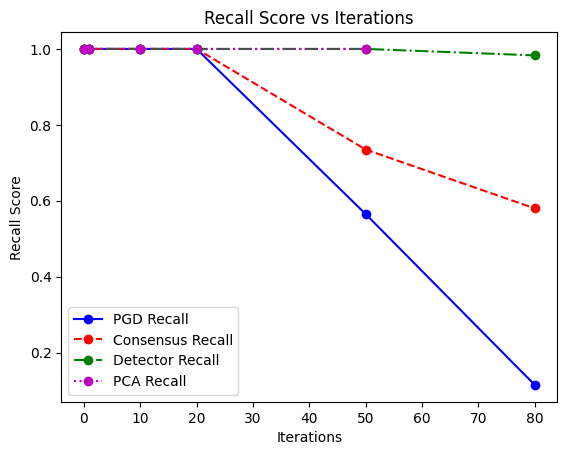

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

# Data
iterations = [0, 1, 10, 20, 50, 80]
recallPGA = [1.0, 1.0, 1.0, 1.0, 0.565, 0.115]
recallPGAConsensus = [1.0, 1.0, 1.0, 1.0, 0.735, 0.580]
recallPGADetector = [1.0, 1.0, 1.0, 1.0, 1.0, 0.983]
recallPCA = [1.0, 1.0, 1.0, 1.0, 1.0]

# Clearing plots
plt.clf()
plt.legend().remove()

# Plotting Curves
plt.plot(iterations, recallPGA, marker='o', linestyle='-', color='b', label='PGD Recall')
plt.plot(iterations, recallPGAConsensus, marker='o', linestyle='--', color='r', label='Consensus Recall')
plt.plot(iterations, recallPGADetector, marker='o', linestyle='-.', color='g', label='Detector Recall')
plt.plot(iterations[:5], recallPCA, marker='o', linestyle=':', color='m', label='PCA Recall')

# Adding plot title and labels
plt.title('Recall Score vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Recall Score')

# Adding legend
plt.legend()

# Show the plot
plt.show()
plt.savefig('RecallScorePCA.png', format='png')
files.download('RecallScorePCA.png')


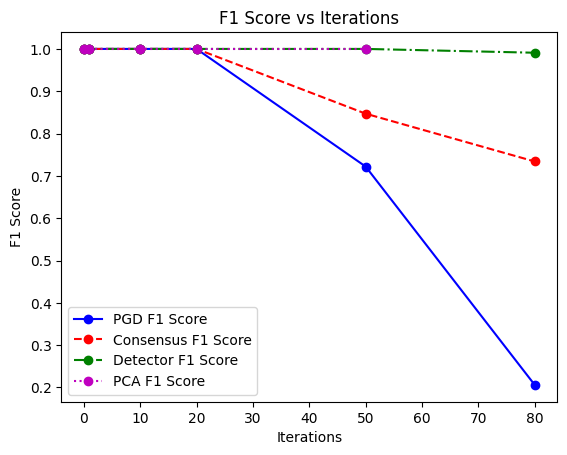

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

# Data
iterations = [0, 1, 10, 20, 50, 80]
f1PGA = [1.0, 1.0, 1.0, 1.0, 0.722, 0.206]
f1PGAConsensus = [1.0, 1.0, 1.0, 1.0, 0.847, 0.734]
f1PGADetector = [1.0, 1.0, 1.0, 1.0, 1.0, 0.991]
f1PCA = [1.0, 1.0, 1.0, 1.0, 1.0]

# Clearing plots
plt.clf()
plt.legend().remove()

# Plotting Curves
plt.plot(iterations, f1PGA, marker='o', linestyle='-', color='b', label='PGD F1 Score')
plt.plot(iterations, f1PGAConsensus, marker='o', linestyle='--', color='r', label='Consensus F1 Score')
plt.plot(iterations, f1PGADetector, marker='o', linestyle='-.', color='g', label='Detector F1 Score')
plt.plot(iterations[:5], f1PCA, marker='o', linestyle=':', color='m', label='PCA F1 Score')

# Adding plot title and labels
plt.title('F1 Score vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('F1 Score')

# Adding legend
plt.legend()

# Show the plot
plt.show()
plt.savefig('F1ScorePCA.png', format='png')
files.download('F1ScorePCA.png')


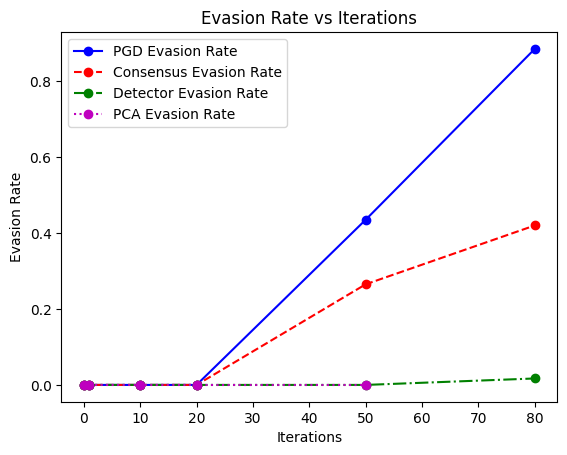

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

# Data
iterations = [0, 1, 10, 20, 50, 80]
evasionRate = [0, 0, 0, 0,  0.435, 0.885]
evasionRatePGAConsensus = [0, 0, 0, 0, 0.265, 0.420]
evasionRatePGADetector = [0, 0, 0, 0, 0, .017]
evasionRatePCA = [0, 0, 0, 0, 0]

# Clearing plots
plt.clf()
plt.legend().remove()

# Plotting Curves
plt.plot(iterations, evasionRate, marker='o', linestyle='-', color='b', label='PGD Evasion Rate')
plt.plot(iterations, evasionRatePGAConsensus, marker='o', linestyle='--', color='r', label='Consensus Evasion Rate')
plt.plot(iterations, evasionRatePGADetector, marker='o', linestyle='-.', color='g', label='Detector Evasion Rate')
plt.plot(iterations[:5], evasionRatePCA, marker='o', linestyle=':', color='m', label='PCA Evasion Rate')

# Adding plot title and labels
plt.title('Evasion Rate vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Evasion Rate')

# Adding legend
plt.legend()

# Show the plot
plt.show()
plt.savefig('EvasionRatePCA.png', format='png')
files.download('EvasionRatePCA.png')


In [ ]:
recallFGSM = [.520, .547, .632, .592, .592]
evasionRateFgsm = [0.480,  .453, .368, .408, .408]
f1FGSM = [.684, .707, .775, .743, .743]

recallFGSMConsensus = [1.0, 1.0, 1.0, 1.0, 1.0]
f1FGSMConsensus = [1.0, 1.0, 1.0, 1.0, 1.0]
evasionrateConsensus = [0, 0, 0, 0, 0]

recallFGSMDetector = [1.0, 1.0, 1.0, 1.0, 1.0]
f1FGSMDetector = [1.0, 1.0, 1.0, 1.0, 1.0]
evasionRateDetector = [0, 0, 0, 0, 0]

PCAFGSMReacll = [.620, .644, .656, .617, .636]
PCAFGSMf1 = [.770, .784, .792, .763, .778]
PCAFGSMEvasion = [.374, .356, .344, .383, .364]

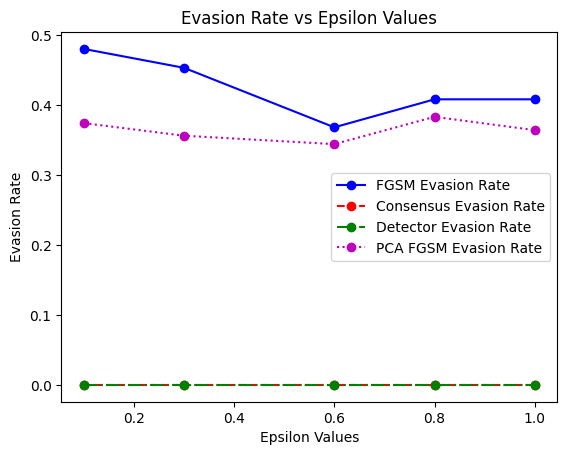

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

# Data
x_values = [0.1, 0.3, 0.6, 0.8, 1]
evasionRateFgsm = [0.480, 0.453, 0.368, 0.408, 0.408]
evasionrateConsensus = [0, 0, 0, 0, 0]
evasionRateDetector = [0, 0, 0, 0, 0]
PCAFGSMEvasion = [0.374, 0.356, 0.344, 0.383, 0.364]

# Clearing plots
plt.clf()
plt.legend().remove()

# Plotting Curves
plt.plot(x_values, evasionRateFgsm, marker='o', linestyle='-', color='b', label='FGSM Evasion Rate')
plt.plot(x_values, evasionrateConsensus, marker='o', linestyle='--', color='r', label='Consensus Evasion Rate')
plt.plot(x_values, evasionRateDetector, marker='o', linestyle='-.', color='g', label='Detector Evasion Rate')
plt.plot(x_values, PCAFGSMEvasion, marker='o', linestyle=':', color='m', label='PCA FGSM Evasion Rate')

# Adding plot title and labels
plt.title('Evasion Rate vs Epsilon Values')
plt.xlabel('Epsilon Values')
plt.ylabel('Evasion Rate')

# Adding legend
plt.legend()

# Show the plot
plt.show()
plt.savefig('EvasionRateFGSM.png', format='png')
files.download('EvasionRateFGSM.png')


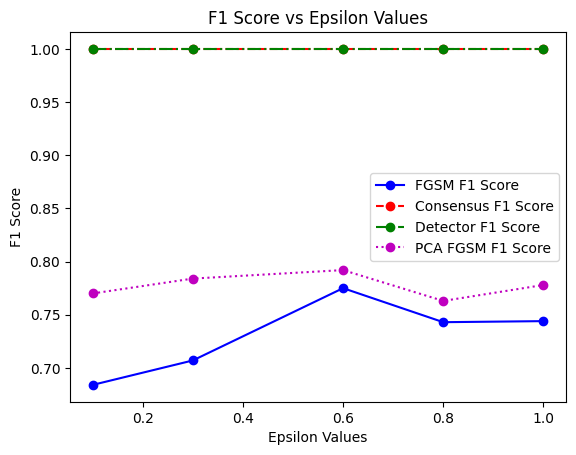

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

# Data
x_values = [0.1, 0.3, 0.6, 0.8, 1]
f1FGSM = [0.684, 0.707, 0.775, 0.743, 0.744]
f1FGSMConsensus = [1.0, 1.0, 1.0, 1.0, 1.0]
f1FGSMDetector = [1.0, 1.0, 1.0, 1.0, 1.0]
PCAFGSMf1 = [0.770, 0.784, 0.792, 0.763, 0.778]

# Clearing plots
plt.clf()
plt.legend().remove()

# Plotting Curves
plt.plot(x_values, f1FGSM, marker='o', linestyle='-', color='b', label='FGSM F1 Score')
plt.plot(x_values, f1FGSMConsensus, marker='o', linestyle='--', color='r', label='Consensus F1 Score')
plt.plot(x_values, f1FGSMDetector, marker='o', linestyle='-.', color='g', label='Detector F1 Score')
plt.plot(x_values, PCAFGSMf1, marker='o', linestyle=':', color='m', label='PCA FGSM F1 Score')

# Adding plot title and labels
plt.title('F1 Score vs Epsilon Values')
plt.xlabel('Epsilon Values')
plt.ylabel('F1 Score')

# Adding legend
plt.legend()

# Show the plot
plt.show()
plt.savefig('F1ScoreFGSM.png', format='png')
files.download('F1ScoreFGSM.png')


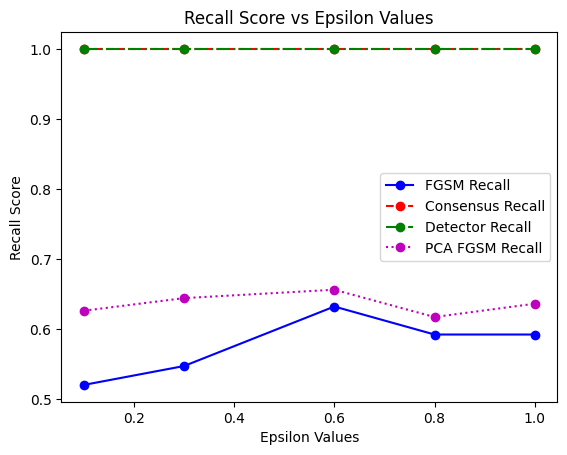

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

# Data
x_values = [0.1, 0.3, 0.6, 0.8, 1]
recallFGSM = [0.520, 0.547, 0.632, 0.592, 0.592]
recallFGSMConsensus = [1.0, 1.0, 1.0, 1.0, 1.0]
recallFGSMDetector = [1.0, 1.0, 1.0, 1.0, 1.0]
PCAFGSMReacll = [0.626, 0.644, 0.656, 0.617, 0.636]

# Clearing plots
plt.clf()
plt.legend().remove()

# Plotting Curves
plt.plot(x_values, recallFGSM, marker='o', linestyle='-', color='b', label='FGSM Recall')
plt.plot(x_values, recallFGSMConsensus, marker='o', linestyle='--', color='r', label='Consensus Recall')
plt.plot(x_values, recallFGSMDetector, marker='o', linestyle='-.', color='g', label='Detector Recall')
plt.plot(x_values, PCAFGSMReacll, marker='o', linestyle=':', color='m', label='PCA FGSM Recall')

# Adding plot title and labels
plt.title('Recall Score vs Epsilon Values')
plt.xlabel('Epsilon Values')
plt.ylabel('Recall Score')

# Adding legend
plt.legend()

# Show the plot
plt.show()
plt.savefig('RecallScoreFGSM.png', format='png')
files.download('RecallScoreFGSM.png')


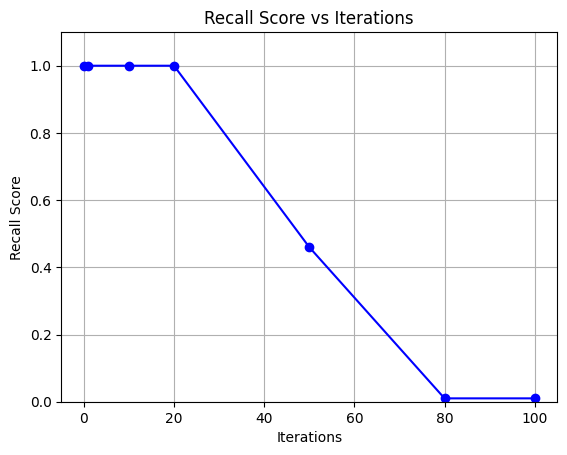

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

# Clearing plots
plt.clf()
plt.legend().remove()

# Plotting Curves
plt.plot(iterations, Recall, marker='o', linestyle='-', color='b')  # Line plot

# Adding plot title and labels
plt.title('Recall Score vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Recall Score')

# Set y-axis limits
plt.ylim(0, 1.1)

# Optional: Add grid
plt.grid(True)

# Show the plot
plt.show()
plt.savefig('FGSMF1.png', format = 'png')
#files.download('FGSMF1.png')

In [ ]:
from google.colab import files
import matplotlib
matplotlib.use('pdf')
# Plotting Graph

# Clearing plots
plt.clf()
plt.legend().remove()

# Plotting Curves
plt.plot(fpr_ocsvm, tpr_ocsvm, color='blue', label='Clean OCSVM')
plt.plot(fpr_ae, tpr_ae, color='red', label='Clean OCAE')
#plt.plot(fpr_ocsvm_dirty, tpr_ocsvm_dirty, color='black', label='Poisoned OCSVM')
#plt.plot(fpr_ae_dirty, tpr_ae_dirty, color='green', label='Poisoned OCAE')

# Add Labels and Legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()
plt.savefig('DDoS_lf.pdf', format = 'pdf')
files.download('DDoS_lf.pdf')

NameError: name 'fpr_ocsvm' is not defined

In [ ]:
import pickle

#with open('SVMmodelNew.pkl','wb') as f:
 #   pickle.dump(MySVM,f)

#with open('AEmodel.pkl','wb') as t:
 #   pickle.dump(MyAutoEncoder,t)

with open('SVMmodelNew.pkl', 'rb') as z:
    MySVM = pickle.load(z)

#with open('AEmodel (1).pkl', 'rb') as k:
  #  AE2 = pickle.load(k)

#fpr_ocsvm, tpr_ocsvm = MySVM.evaluate(Test_Sample, Test_Validation)
#fpr_ae, tpr_ae = AE2.evaluate(Test_Sample, Test_Validation)

In [ ]:
pca = PCA(n_components=70)

TrainingData_pca = pca.fit_transform(TrainingData)

MySVM.fit(TrainingData_pca)

#Validation_Data_pca = pca.transform(Test_Validation)
Test_Sample_pca = pca.transform(Test_Sample)

#fpr_ocsvm, tpr_ocsvm = MySVM.evaluate(Test_Sample_pca, Validation_Data)

In [ ]:
fpr_ocsvm, tpr_ocsvm = MySVM.evaluate(Test_Sample_pca, Test_Validation)

AUC: 0.629
Recall: 0.632
F1 Score: 0.640
Anomaly Count: 29666.000
Accuracy Score: 0.638
[[18974 11026]
 [10692 19308]]


In [ ]:
print(Test_Sample_pca.shape)
print(Test_Validation.shape)

(60000, 70)
(60000,)


In [ ]:
from google.colab import files
import matplotlib
matplotlib.use('pdf')
# Plotting Graph

# Clearing plots
plt.clf()
plt.legend().remove()

# Plotting Curves
plt.plot(fpr_ocsvm, tpr_ocsvm, color='blue', label='Clean OCSVM')
plt.plot(fpr_ae, tpr_ae, color='red', label='Clean OCAE')
#plt.plot(fpr_ocsvm_dirty, tpr_ocsvm_dirty, color='black', label='Poisoned OCSVM')
#plt.plot(fpr_ae_dirty, tpr_ae_dirty, color='green', label='Poisoned OCAE')

# Add Labels and Legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()
plt.savefig('DDoS_lf.pdf', format = 'pdf')
files.download('DDoS_lf.pdf')

NameError: name 'fpr_ocsvm' is not defined